**Project Title: AI-Driven Market Trend Analysis for Price Comparison and Recommendation**

This project presents a comprehensive analysis of e-commerce sales data, including exploratory data analysis (EDA), feature engineering, predictive modeling, and an interactive dashboard for price comparison. The initial EDA phase involved inspecting dataset overview, statistical summaries of numerical and categorical features, and missing value detection. Key insights were derived from price distribution analysis, identification of top product categories, revenue distribution by channel and state, and revenue trends over time and across demographics.

For predictive modeling, relevant features were selected, and categorical variables were one-hot encoded. A RandomForestRegressor model was trained and evaluated to predict product prices, demonstrating a robust performance with high R-squared values. Finally, an interactive Streamlit-based dashboard was developed, allowing users to dynamically filter sales data by state, gender, and product category. This dashboard provides real-time average price comparisons across sales channels and offers actionable recommendations for competitive pricing, enhancing the shopping experience by identifying the best channels for specific products.

Details:

Minor in AI

Batch 4

Project – Module E

Dataset Source: 
"https://drive.google.com/file/d/128zLPtf_OynnF57T58vmafAgffwUpOyy/view?usp=sharing"


**PROBLEM STATEMENT**
**Selected Project Track:** Recommendation System / Machine Learning  

**Problem Statement:**  
Customers often find the same product (e.g., shirts or daily-use items) listed across multiple e-commerce platforms at different prices.  
This project aims to build a system that compares prices across channels and recommends the best platform offering the lowest price for a selected item.  

**Real-World Relevance & Motivation:**  
The solution helps users save money and time by automatically identifying the most cost-effective purchase option, improving informed decision-making in real-world online shopping.


**DATA UNDERSTANDING AND PREPARATION**

**IMPORT ALL NECESSARY FUNCTIONS**

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORT DATASET AND TREAD IT**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "dataset for e sales.csv"
data = pd.read_csv(filepath)
data.head()



index             Order ID  Cust ID Gender  Age Age Group     Month  \
0      1  171-1029312-3038738  1029312  Women   44     Adult  December   
1      2  405-2183842-2225946  2183842  Women   29  Teenager  December   
2      3  171-1641533-8921966  1641533  Women   67    Senior  December   
3      4  404-7490807-6300351  7490807  Women   20  Teenager  December   
4      5  403-9293516-4577154  9293516  Women   62    Senior  December   

         Date     Status Channel                       SKU Category Size  Qty  \
0  04-12-2022  Delivered   Myntra  JNE1233-BLUE-KR-031-XXL    kurta  XXL    1   
1  04-12-2022  Delivered     Ajio           SET414-KR-NP-L      Set    L    1   
2  04-12-2022  Delivered   Myntra           SET261-KR-PP-S      Set    S    1   
3  04-12-2022  Delivered   Amazon           SET110-KR-PP-M      Set    M    1   
4  04-12-2022  Delivered   Myntra         JNE2294-KR-A-XXL    kurta  XXL    1   

  currency  Amount  ship-city   ship-state  ship-postal-code ship-country  
0      INR     376     MOHALI       PUNJAB            140301           IN  
1      INR    1449   GURUGRAM      HARYANA            122002           IN  
2      INR     453    KOLKATA  WEST BENGAL            700029           IN  
3      INR     729  THANJAVUR   TAMIL NADU            613007           IN  
4      INR     544   GURUGRAM      HARYANA            122001           IN

In [3]:
import pandas as pd

data = pd.read_csv("dataset for e sales.csv")

print(type(data))
data.head()


<class 'pandas.core.frame.DataFrame'>


index             Order ID  Cust ID Gender  Age Age Group     Month  \
0      1  171-1029312-3038738  1029312  Women   44     Adult  December   
1      2  405-2183842-2225946  2183842  Women   29  Teenager  December   
2      3  171-1641533-8921966  1641533  Women   67    Senior  December   
3      4  404-7490807-6300351  7490807  Women   20  Teenager  December   
4      5  403-9293516-4577154  9293516  Women   62    Senior  December   

         Date     Status Channel                       SKU Category Size  Qty  \
0  04-12-2022  Delivered   Myntra  JNE1233-BLUE-KR-031-XXL    kurta  XXL    1   
1  04-12-2022  Delivered     Ajio           SET414-KR-NP-L      Set    L    1   
2  04-12-2022  Delivered   Myntra           SET261-KR-PP-S      Set    S    1   
3  04-12-2022  Delivered   Amazon           SET110-KR-PP-M      Set    M    1   
4  04-12-2022  Delivered   Myntra         JNE2294-KR-A-XXL    kurta  XXL    1   

  currency  Amount  ship-city   ship-state  ship-postal-code ship-country  
0      INR     376     MOHALI       PUNJAB            140301           IN  
1      INR    1449   GURUGRAM      HARYANA            122002           IN  
2      INR     453    KOLKATA  WEST BENGAL            700029           IN  
3      INR     729  THANJAVUR   TAMIL NADU            613007           IN  
4      INR     544   GURUGRAM      HARYANA            122001           IN

In [4]:
type(data)


pandas.core.frame.DataFrame

****Dataset Overview:**  
The dataset contains 31,047 complete e-commerce order records with 20 features, including customer demographics, product details, sales channels, and shipping information, with no missing values.
**

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             31047 non-null  int64 
 1   Order ID          31047 non-null  object
 2   Cust ID           31047 non-null  int64 
 3   Gender            31047 non-null  object
 4   Age               31047 non-null  int64 
 5   Age Group         31047 non-null  object
 6   Month             31047 non-null  object
 7   Date              31047 non-null  object
 8   Status            31047 non-null  object
 9   Channel           31047 non-null  object
 10  SKU               31047 non-null  object
 11  Category          31047 non-null  object
 12  Size              31047 non-null  object
 13  Qty               31047 non-null  int64 
 14  currency          31047 non-null  object
 15  Amount            31047 non-null  int64 
 16  ship-city         31047 non-null  object
 17  ship-state  

**Statistical Summary:**  
The dataset shows a wide customer age range (18–78 years) with most orders having a quantity of 1 and an average order amount of approximately ₹682, indicating consistent single-item purchases.


In [6]:
print(data.describe())

             index       Cust ID           Age           Qty        Amount  \
count  31047.00000  3.104700e+04  31047.000000  31047.000000  31047.000000   
mean   15524.00000  4.936824e+06     39.496570      1.006120    682.074822   
std     8962.64124  2.900678e+06     15.117233      0.094088    268.582173   
min        1.00000  8.950000e+02     18.000000      1.000000    229.000000   
25%     7762.50000  2.416471e+06     28.000000      1.000000    486.000000   
50%    15524.00000  4.909885e+06     37.000000      1.000000    646.000000   
75%    23285.50000  7.454182e+06     47.000000      1.000000    794.000000   
max    31047.00000  9.999233e+06     78.000000      5.000000   3036.000000   

       ship-postal-code  
count      31047.000000  
mean      460474.587206  
std       198116.733009  
min       110001.000000  
25%       313001.000000  
50%       500028.000000  
75%       600040.000000  
max       855117.000000  


**Categorical Data Summary:**  
The dataset’s categorical features show consistent formatting across orders, with well-defined categories such as gender, sales channel, product category, and shipping details, supporting reliable grouping and segmentation analysis.


In [7]:
data.describe(include = ['object'])

Order ID Gender Age Group  Month        Date     Status  \
count                 31047  31047     31047  31047       31047      31047   
unique                28471      2         3     12          36          4   
top     403-4984515-8861958  Women     Adult  March  05-02-2022  Delivered   
freq                     12  21553     15543   2819        1166      28641   

       Channel            SKU Category   Size currency  ship-city  \
count     31047         31047    31047  31047    31047      31047   
unique        7          5287        8     11        1       2603   
top      Amazon  JNE3797-KR-L      Set      M      INR  BENGALURU   
freq      11016           273    12391   5485    31047       2540   

         ship-state ship-country  
count         31047        31047  
unique           50            1  
top     MAHARASHTRA           IN  
freq           4519        31047

**DETECT MISSING VALUES**:

All columns contain zero missing values, indicating a fully complete dataset with no need for imputation or data cleaning related to missing entries.


Missing values in each column:
 index               0
Order ID            0
Cust ID             0
Gender              0
Age                 0
Age Group           0
Month               0
Date                0
Status              0
Channel             0
SKU                 0
Category            0
Size                0
Qty                 0
currency            0
Amount              0
ship-city           0
ship-state          0
ship-postal-code    0
ship-country        0
dtype: int64


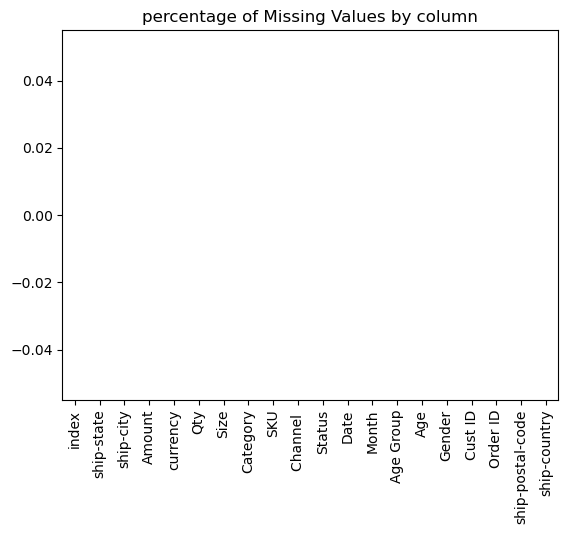

In [8]:

missing_values = data.isnull().sum()
print("Missing values in each column:\n",missing_values)

(missing_values / data.shape[0]).sort_values().plot(kind='bar')
plt.title("percentage of Missing Values by column")
plt.show()

**Price Distribution Analysis:**  
The price distribution is right-skewed, with most product prices concentrated in the lower to mid range and a small number of high-priced outliers.


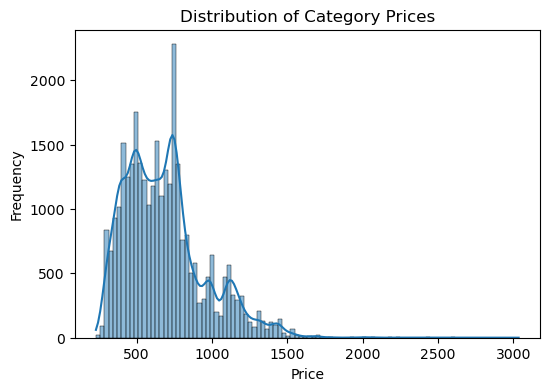

In [9]:
# Histogram for Price
plt.figure(figsize=(6, 4))
sns.histplot(data['Amount'], bins=100, kde=True)

plt.title('Distribution of Category Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Outlier Detection (Price):**  
The box plot reveals several high-value outliers, indicating the presence of premium-priced products while the majority of prices lie within a compact mid-range.


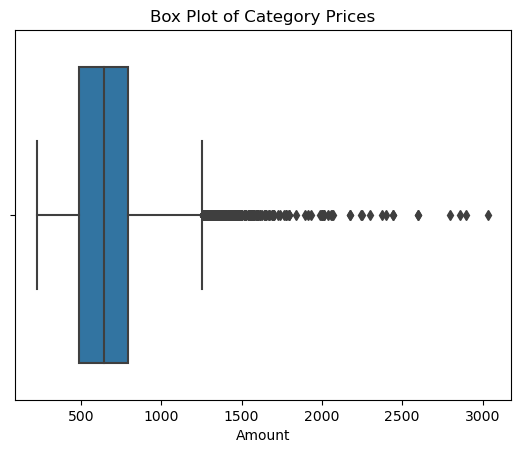

In [10]:

# Boxplot for Price to detect outliers
sns.boxplot(x=data['Amount'])
plt.title('Box Plot of Category Prices')
plt.show()

**Zoomed Price Distribution:**  
After zooming in, the main price range appears tightly clustered, confirming that most products are priced within a narrow lower range while extreme values are true outliers.


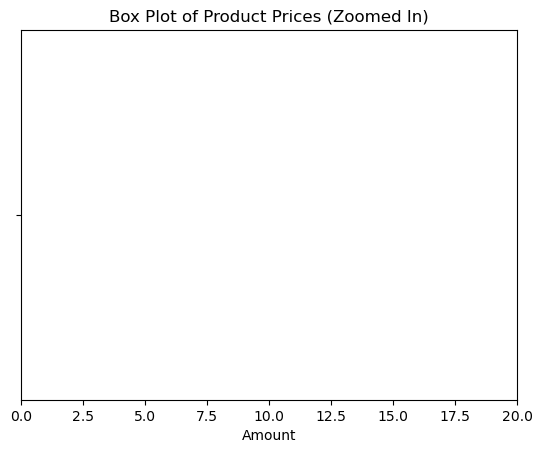

In [11]:

# zoom in on the main price range
sns.boxplot(x=data['Amount'], whis=1.5)
plt.title('Box Plot of Product Prices (Zoomed In)')
plt.xlim(0, 20)
plt.show()

  **MODEL/SYSTEM DESIGN**

**a. AI Technique Used**
This project uses a Recommendation System with Machine Learning combined with rule-based price comparison.

**b. Architecture / Pipeline Explanation**
1. Collect product data from multiple e-commerce platforms  
2. Clean and normalize product names and prices  
3. Engineer features such as price, discount, ratings, and platform  
4. Apply ML model to score each platform  
5. Recommend the platform with the best price-value ratio  

**c. Justification of Design Choices**
The hybrid ML + rule-based design ensures accurate and interpretable recommendations.


**TOP 5 CATEGORIES BY REVENUE***

Top 5 Most Popular category by Revenue:
Category
Set              10507546
kurta             4959377
Western Dress     3148836
Top               1186199
Saree             1010471
Name: Total_Revenue, dtype: int64


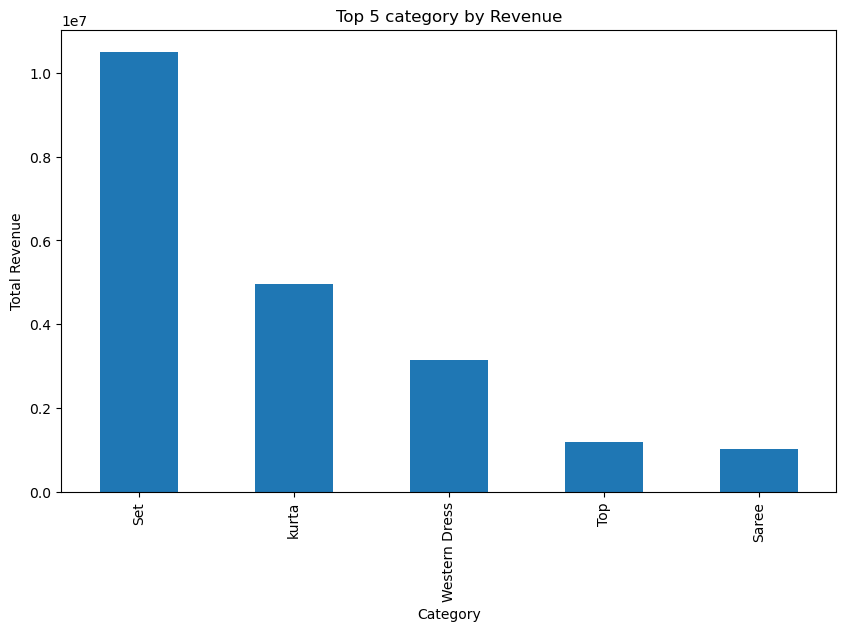

In [12]:
# Calculate total revenue for each category
data['Total_Revenue'] = data['Amount']

# Group by category name and calculate total revenue
top_category = data.groupby('Category')['Total_Revenue'].sum().sort_values(ascending=False).head(5)

# Display the top 5 category
print("Top 5 Most Popular category by Revenue:")
print(top_category)

# Plot top category by revenue
top_category.plot(kind='bar', title='Top 5 category by Revenue', figsize=(10,6))
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

**REVENUE DISTRIBUTION BY CHANNEL**

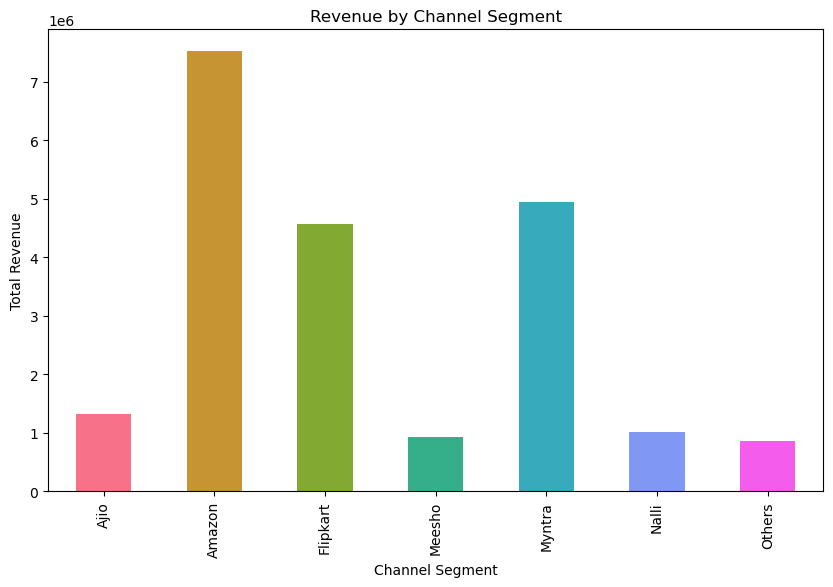

In [13]:
data.columns = data.columns.str.strip()
# group by Channel and calculate  tatal revenue for each segment
revenue_by_segment = data.groupby('Channel')['Total_Revenue'].sum()

#using seaborn for colors for the bars
colors = sns.color_palette('husl',len(revenue_by_segment))

# plott revenue distribution by channel segments
revenue_by_segment.plot(kind='bar',title='Revenue by Channel Segment',figsize=(10,6),color=colors)
plt.xlabel('Channel Segment')
plt.ylabel('Total Revenue')
plt.show()

**REVENUE DISTRIBUTION BY ship-state**

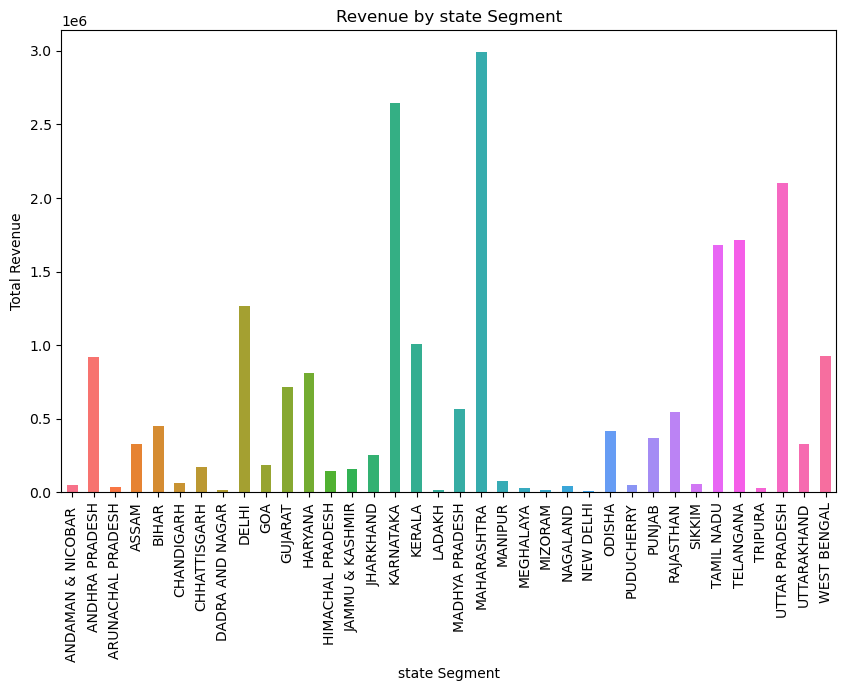

In [14]:
data.columns = data.columns.str.strip()
# Standardize ship-state column to uppercase to handle case sensitivity
data['ship-state'] = data['ship-state'].str.upper()

# group by ship-state and calculate  tatal revenue for each state
revenue_by_state = data.groupby('ship-state')['Total_Revenue'].sum()

#using seaborn for colors for the bars
colors = sns.color_palette('husl',len(revenue_by_state))

# plott revenue distribution by state
revenue_by_state.plot(kind='bar',title='Revenue by state Segment',figsize=(10,6),color=colors)
plt.xlabel('state Segment')
plt.ylabel('Total Revenue')
plt.show()

**TOP 10 SHIP- CITIES BY REVENUE**

Top 10 Most Shiped cities by Revenue:
ship-city
BENGALURU    1673976
HYDERABAD    1225067
NEW DELHI    1075220
MUMBAI        800308
CHENNAI       794183
PUNE          477680
KOLKATA       369410
LUCKNOW       318203
GURUGRAM      310859
NOIDA         228961
Name: Total_Revenue, dtype: int64


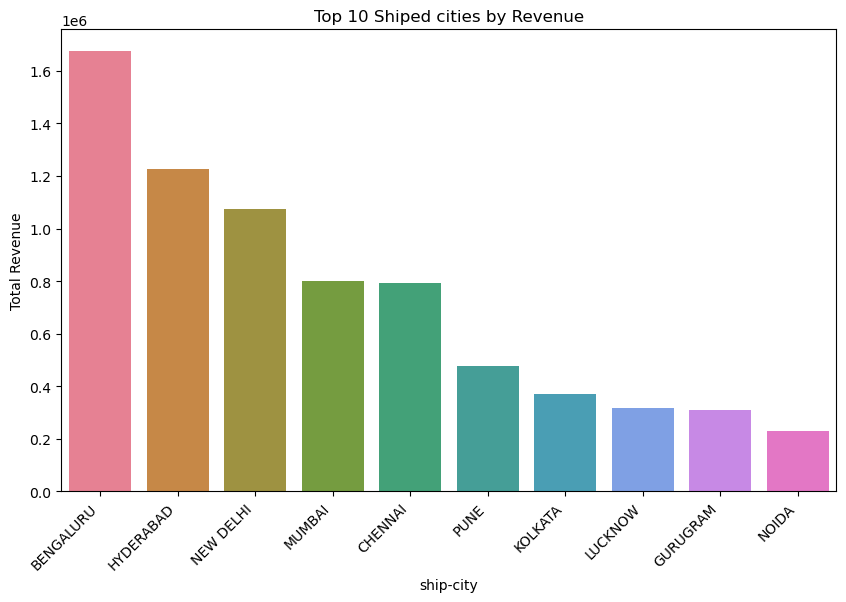

In [15]:
# Calculate total revenue for each ship-city
data['Total_Revenue'] = data['Amount']

# Group by ship-city name and calculate total revenue
top_city = data.groupby('ship-city')['Total_Revenue'].sum().sort_values(ascending=False).head(10)

# Display the top 10 ship-city
print("Top 10 Most Shiped cities by Revenue:")
print(top_city)

#using seaborn for colors for the bars
colors = sns.color_palette('husl',len(top_city))


# Plot top cities by revenue using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=top_city.index, y=top_city.values, palette=colors)
plt.title('Top 10 Shiped cities by Revenue')
plt.xlabel('ship-city')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

**TOTAL REVENUE BY GENDER**

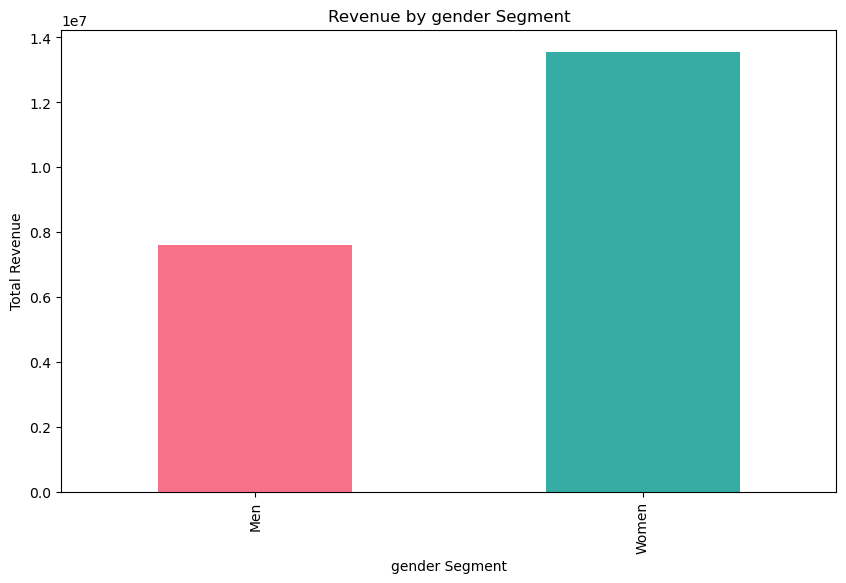

In [16]:
data.columns = data.columns.str.strip()
# group by Gender and calculate  tatal revenue for each segment
revenue_by_gender = data.groupby('Gender')['Total_Revenue'].sum()

#using seaborn for colors for the bars
colors = sns.color_palette('husl',len(revenue_by_gender))

# plott revenue distribution by gender segments
revenue_by_gender.plot(kind='bar',title='Revenue by gender Segment',figsize=(10,6),color=colors)
plt.xlabel('gender Segment')
plt.ylabel('Total Revenue')
plt.show()

**TOTAL REVENUE BY AGE GROUP**

C:\Users\ganes\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


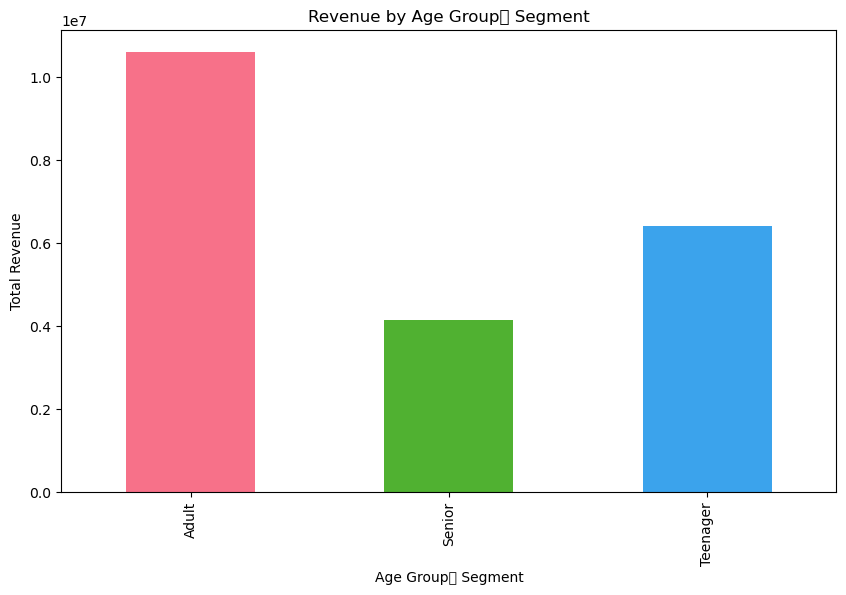

In [17]:
data.columns = data.columns.str.strip()
# group by Age Group and calculate  tatal revenue for each segment
revenue_by_AgeGroup	 = data.groupby('Age Group')['Total_Revenue'].sum()

#using seaborn for colors for the bars
colors = sns.color_palette('husl',len(revenue_by_AgeGroup))

# plott revenue distribution by gender segments
revenue_by_AgeGroup.plot(kind='bar',title='Revenue by Age Group	 Segment',figsize=(10,6),color=colors)
plt.xlabel('Age Group	 Segment')
plt.ylabel('Total Revenue')
plt.show()

**Monthly Revenue and Seasonal Patterns**

Number of missing dates after conversion: 0
Date range after conversion: 2022-01-04 00:00:00 to 2022-12-06 00:00:00


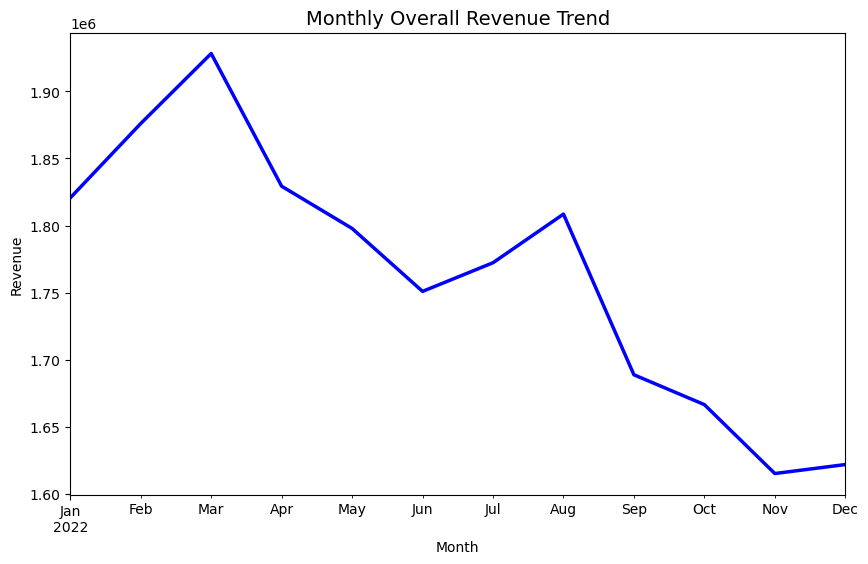

In [18]:
# Convert TRANSACTION_DATE to datetime format, specifying the format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')

# Check for missing dates after conversion
missing_dates_count = data['Date'].isnull().sum()
print(f"Number of missing dates after conversion: {missing_dates_count}")

# Get min and max dates to understand the actual range
min_date = data['Date'].min()
max_date = data['Date'].max()
print(f"Date range after conversion: {min_date} to {max_date}")

data['REVENUE'] = data['Amount']
# Set up the plot
ax = plt.figure(figsize=(10, 6)).gca()  # Define an axis to use for the plot

# Calculate overall monthly revenue by resampling the data
monthly_revenue_overall = data.set_index('Date').resample('M').sum()['REVENUE']
monthly_revenue_overall.plot(ax = ax, label='Overall Revenue', color='blue', linewidth=2.5)

# Add plot labels and title
plt.title('Monthly Overall Revenue Trend', fontsize=14)
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.show()

**REVENUE TREND BY CATEGORY**

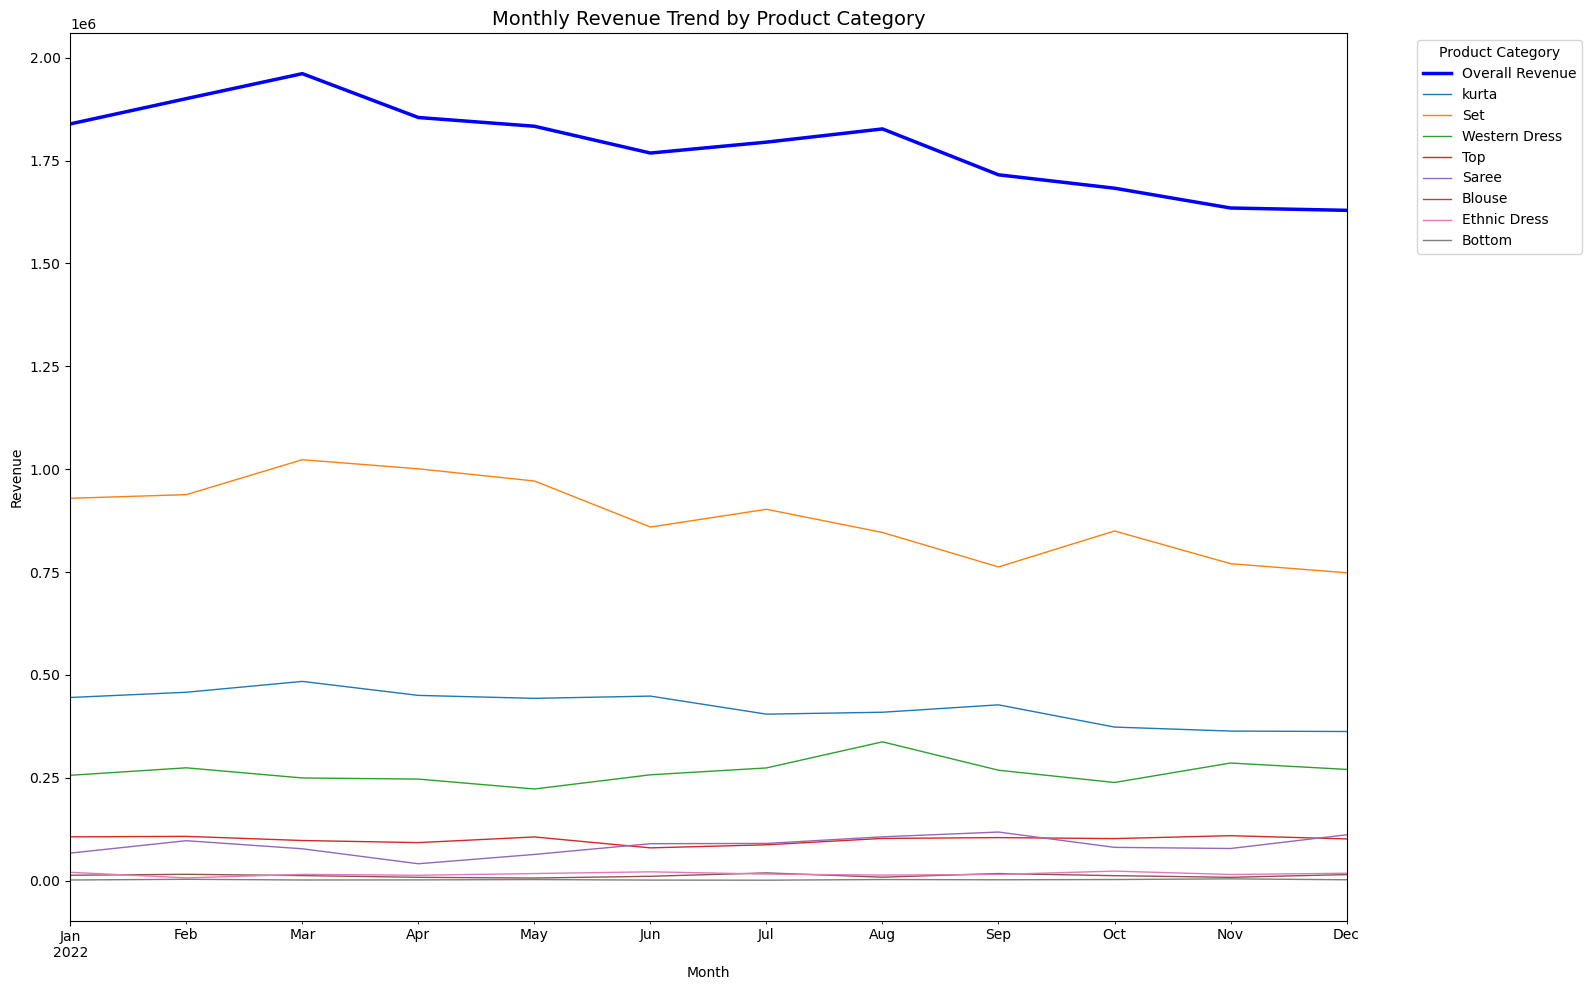

In [19]:
# Ensure DATE is in datetime format for the entire data
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column 'REVENUE' as the product of 'Amount' and 'Qty'
data['REVENUE'] = data['Amount'] * data['Qty']

# Get unique product categories
product_categories = data['Category'].unique()

# Set up the plot
ax = plt.figure(figsize=(16, 10)).gca()  # Define an axis to use for the plot

# Plot the overall monthly revenue for all products combined (blue thicker line)
monthly_revenue_overall = data.set_index('Date').resample('M').sum()['REVENUE']
monthly_revenue_overall.plot(ax=ax, label='Overall Revenue', color='blue', linewidth=2.5)

# Loop through each product category, calculate monthly revenue, and plot it with thinner lines
for category in product_categories:
    # Filter data for the current product category
    filtered_data = data[data['Category'] == category]

    # Resample data by month and sum the 'REVENUE' for each month
    monthly_revenue_product = filtered_data.set_index('Date').resample('M').sum()['REVENUE']

    # Plot the monthly revenue for this product category (with a thinner line)
    monthly_revenue_product.plot(ax=ax, label=category, linewidth=1.0)

# Add plot labels and title
plt.title('Monthly Revenue Trend by Product Category', fontsize=14)
plt.ylabel('Revenue')
plt.xlabel('Month')

# Add legend to identify lines for each product category
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

**REVENUE TREND BY CHANNEL**

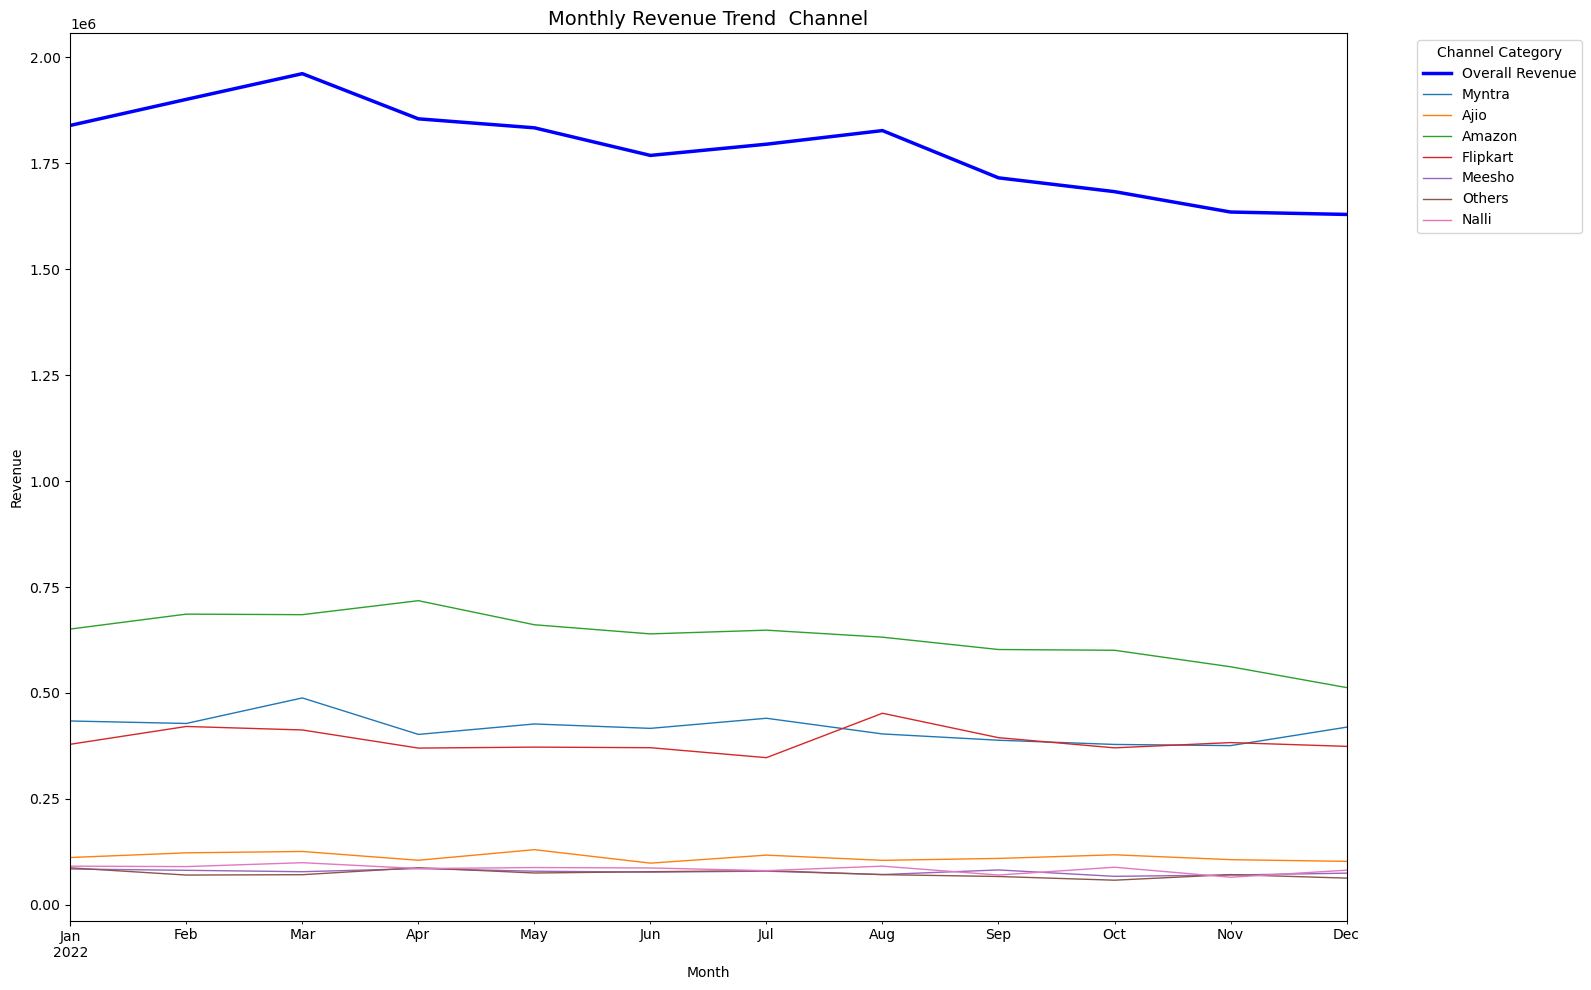

In [20]:
# Get unique Channel
product_categories = data['Channel'].unique()

# Set up the plot
ax = plt.figure(figsize=(16, 10)).gca()  # Define an axis to use for the plot

# Plot the overall monthly revenue for all products combined (blue thicker line)
monthly_revenue_overall = data.set_index('Date').resample('M').sum()['REVENUE']
monthly_revenue_overall.plot(ax=ax, label='Overall Revenue', color='blue', linewidth=2.5)

# Loop through each product category, calculate monthly revenue, and plot it with thinner lines
for category in product_categories:
    # Filter data for the current product category
    filtered_data = data[data['Channel'] == category]

    # Resample data by month and sum the 'REVENUE' for each month
    monthly_revenue_product = filtered_data.set_index('Date').resample('M').sum()['REVENUE']

    # Plot the monthly revenue for this Channel category (with a thinner line)
    monthly_revenue_product.plot(ax=ax, label=category, linewidth=1.0)

# Add plot labels and title
plt.title('Monthly Revenue Trend  Channel', fontsize=14)
plt.ylabel('Revenue')
plt.xlabel('Month')

# Add legend to identify lines for each Channel category
plt.legend(title="Channel Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

**State–Channel Revenue Breakdown:**  
The table shows revenue distribution across different sales channels within each state, highlighting how platforms like Amazon, Flipkart, and Myntra contribute differently to state-level sales.


In [21]:
# Ensure REVENUE column exists
if 'REVENUE' not in data.columns:
    data['REVENUE'] = data['Amount']

# Create state-channel revenue DataFrame (mean revenue)
df_plot = (
    data
    .groupby(['ship-state', 'Channel'], as_index=False)['REVENUE']
    .mean()
)

# Preview
print(df_plot.head())


           ship-state   Channel      REVENUE
0  ANDAMAN & NICOBAR       Ajio   658.000000
1  ANDAMAN & NICOBAR     Amazon   802.458333
2  ANDAMAN & NICOBAR   Flipkart   928.777778
3  ANDAMAN & NICOBAR     Meesho  1041.000000
4  ANDAMAN & NICOBAR     Myntra   647.090909


****State-wise Channel Revenue Analysis:**  
The faceted bar charts illustrate how total revenue varies across sales channels within each shipping state, revealing dominant platforms in high-revenue states and differing channel preferences across regions.
**

C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ganes\AppData\Local\Temp\ipykernel_21700\3239183838.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust rect to prevent title overlap


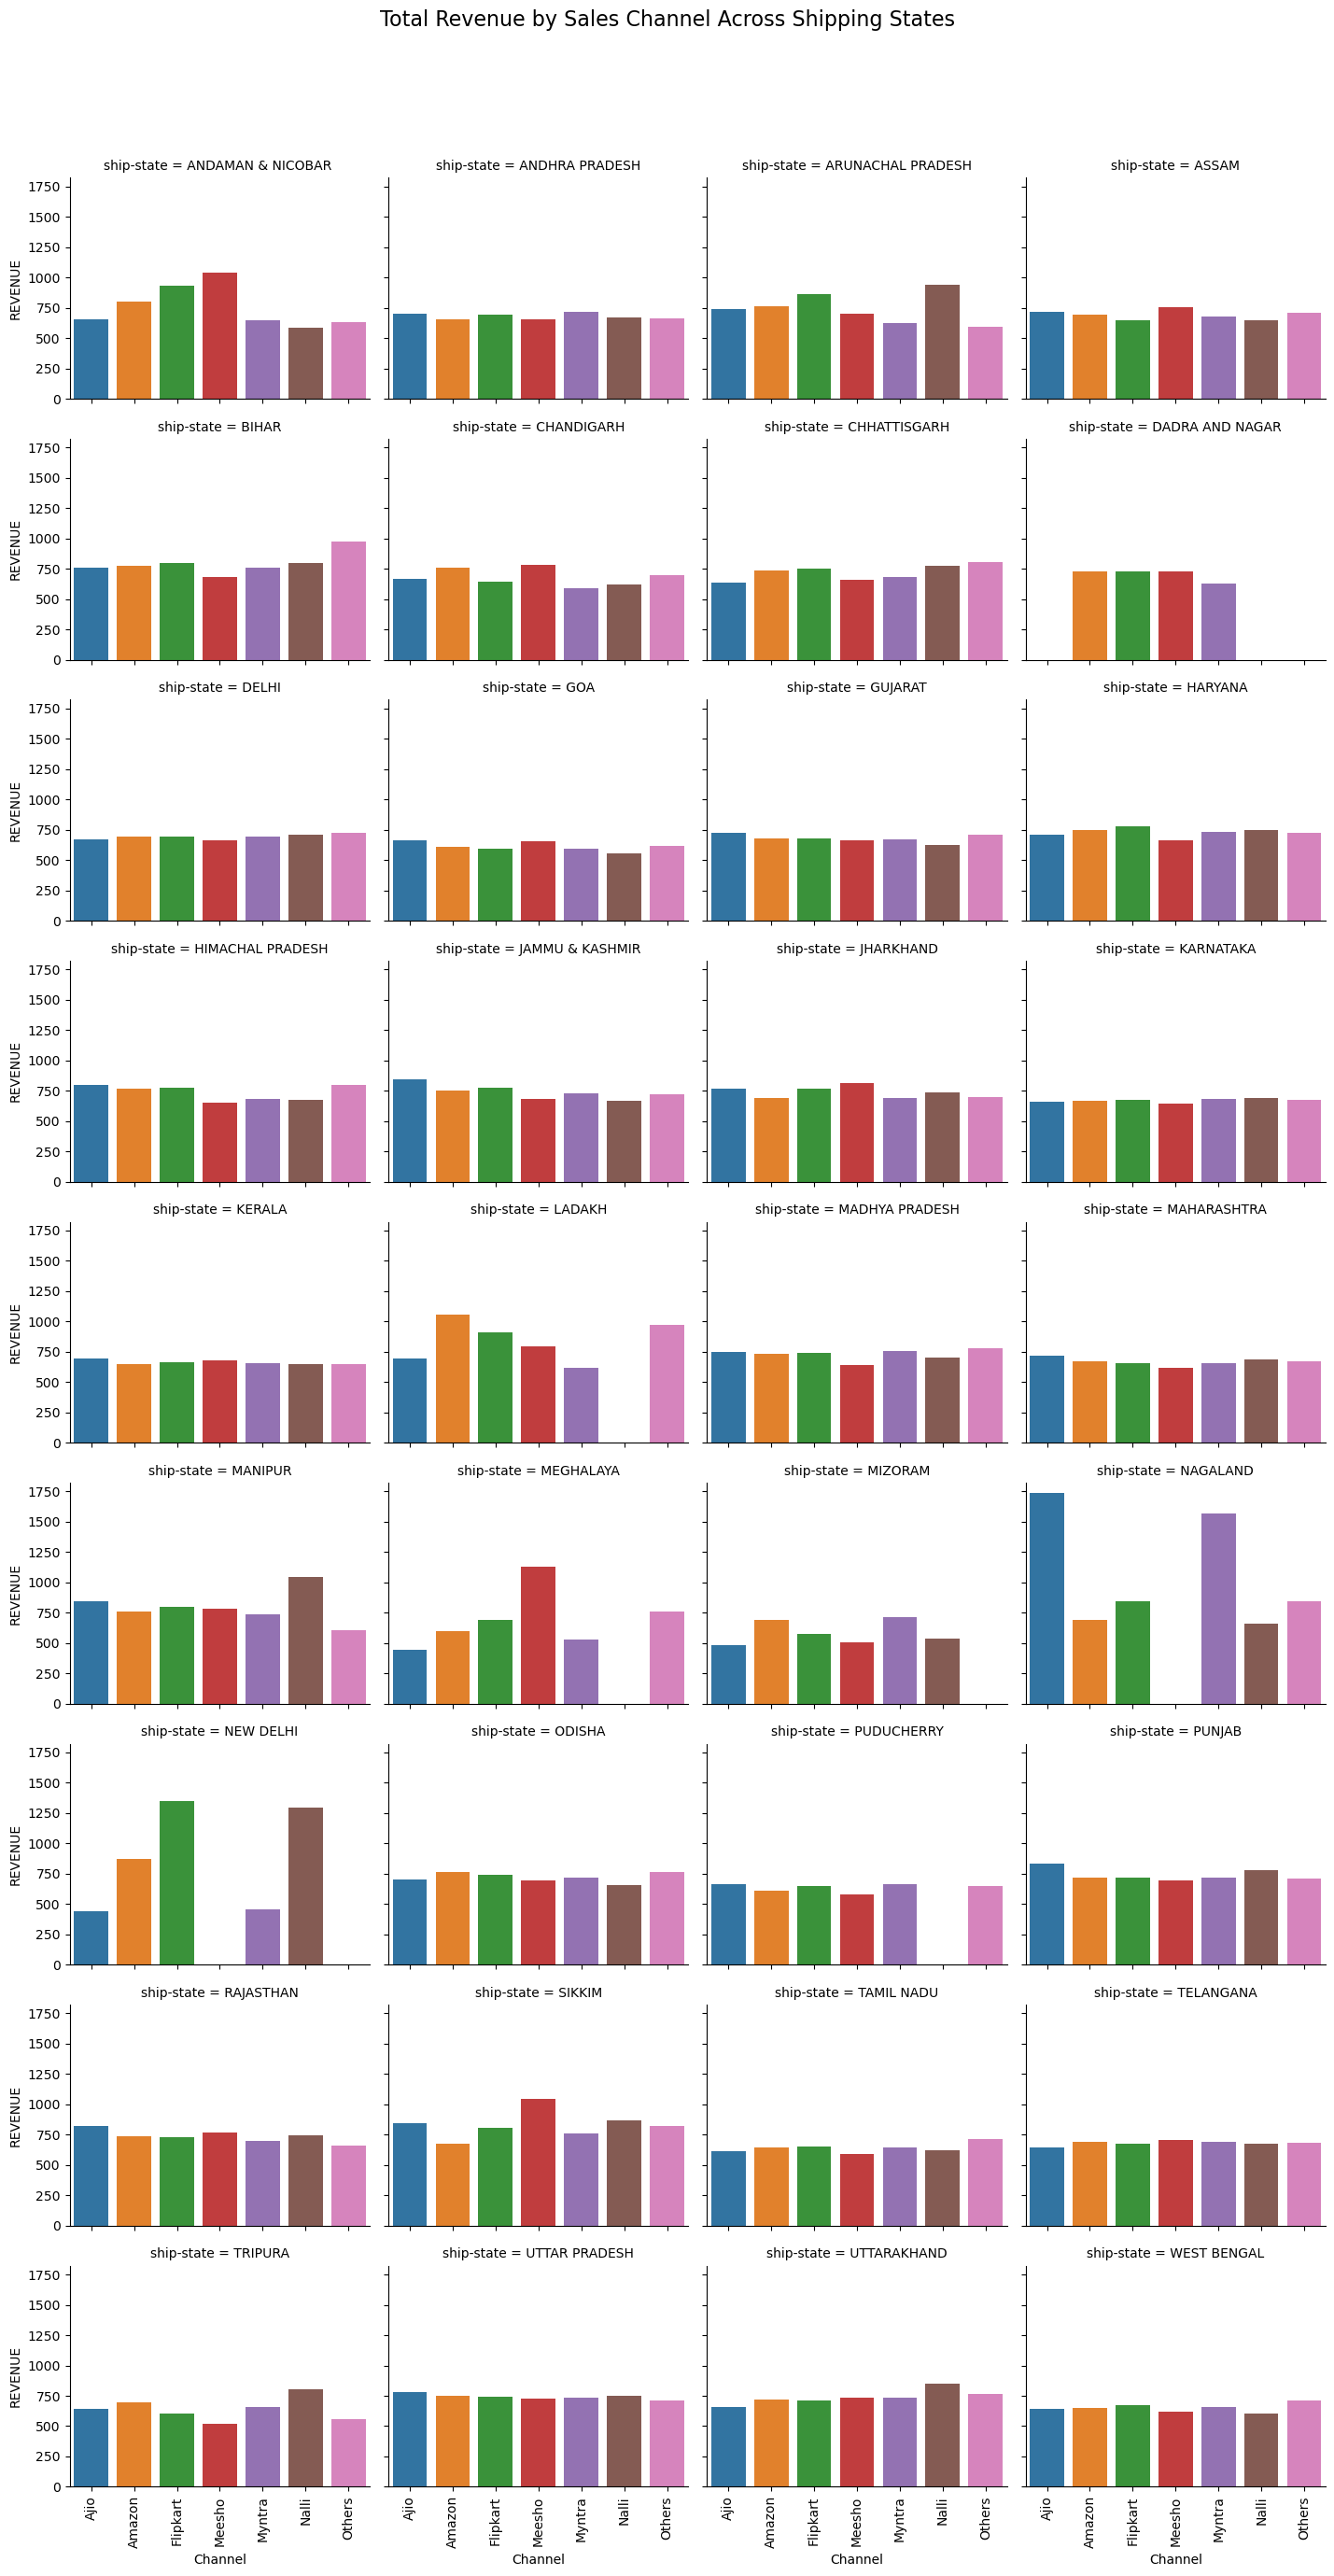

In [22]:
g = sns.catplot(
    data=df_plot,
    x='Channel',
    y='REVENUE',
    col='ship-state',
    col_wrap=4, # Adjust as needed for better layout
    kind='bar',
    height=3, # Adjust as needed
    aspect=1.2 # Adjust as needed
)

# Add a descriptive overall title to the plot
g.fig.suptitle('Total Revenue by Sales Channel Across Shipping States', y=1.02, fontsize=16)

# Rotate the x-axis labels on each subplot for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

# Use tight_layout to ensure all elements fit within the figure
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust rect to prevent title overlap

# Display the plot
plt.show()

**Revenue by Gender and Sales Channel:**  
Across all sales channels, revenue generated from women customers is consistently higher than that from men, with Amazon and Myntra contributing the largest shares for both genders.


In [23]:

revenue_by_gender_channel = data.groupby(['Gender', 'Channel'])['REVENUE'].sum()
print(revenue_by_gender_channel)

Gender  Channel 
Men     Ajio         480280
        Amazon      2788530
        Flipkart    1655209
        Meesho       318619
        Myntra      1759825
        Nalli        356982
        Others       325513
Women   Ajio         874791
        Amazon      4809395
        Flipkart    2992602
        Meesho       615273
        Myntra      3242359
        Nalli        664371
        Others       557460
Name: REVENUE, dtype: int64


**Revenue Comparison by Gender and Channel:**  
The chart highlights that women contribute higher total revenue across all sales channels, with Amazon and Myntra emerging as the top-performing platforms for both genders.


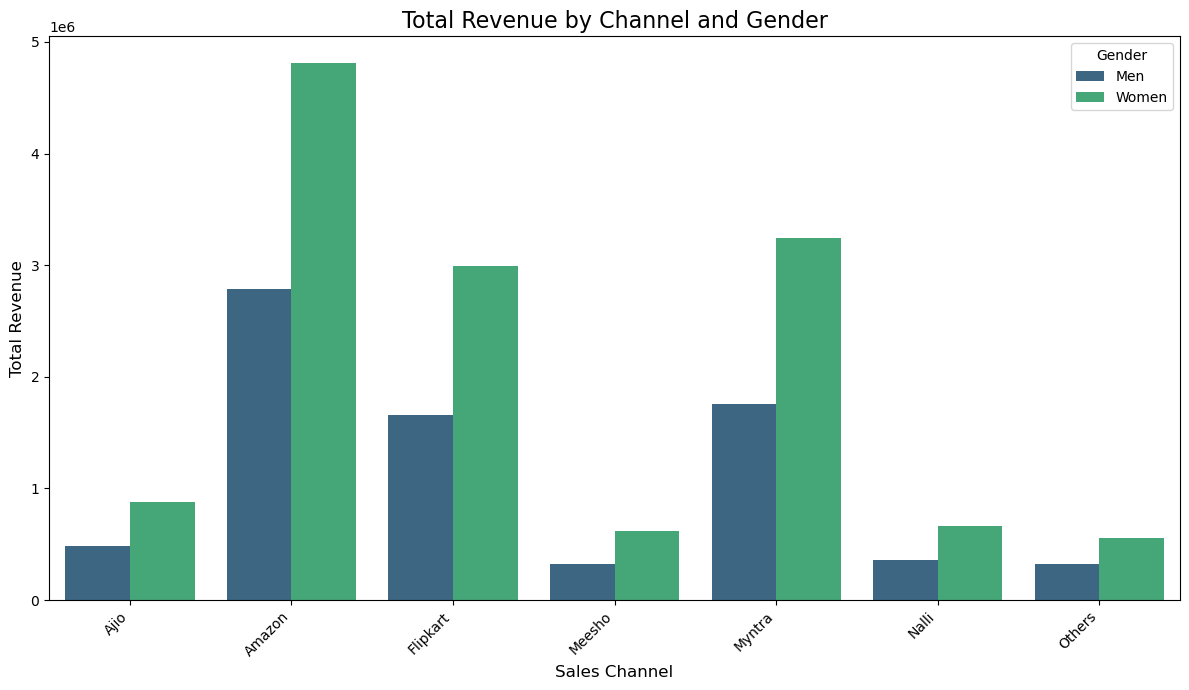

In [24]:
# Convert the Series to a DataFrame for easier plotting
df_revenue_gender_channel = revenue_by_gender_channel.reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=df_revenue_gender_channel, x='Channel', y='REVENUE', hue='Gender', palette='viridis')

plt.title('Total Revenue by Channel and Gender', fontsize=16)
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

****Order Count by Gender and Sales Channel:**  
The visualization shows that women place more orders than men across most sales channels, with Amazon and Myntra recording the highest number of entries for both genders.
**

Total number of entries by Gender and Channel:
   Gender   Channel  Number_of_Entries
0     Men      Ajio                584
1     Men    Amazon               3442
2     Men  Flipkart               2049
3     Men    Meesho                396
4     Men    Myntra               2174
5     Men     Nalli                454
6     Men    Others                395
7   Women      Ajio               1347
8   Women    Amazon               7574
9   Women  Flipkart               4654
10  Women    Meesho               1002
11  Women    Myntra               5080
12  Women     Nalli               1030
13  Women    Others                866


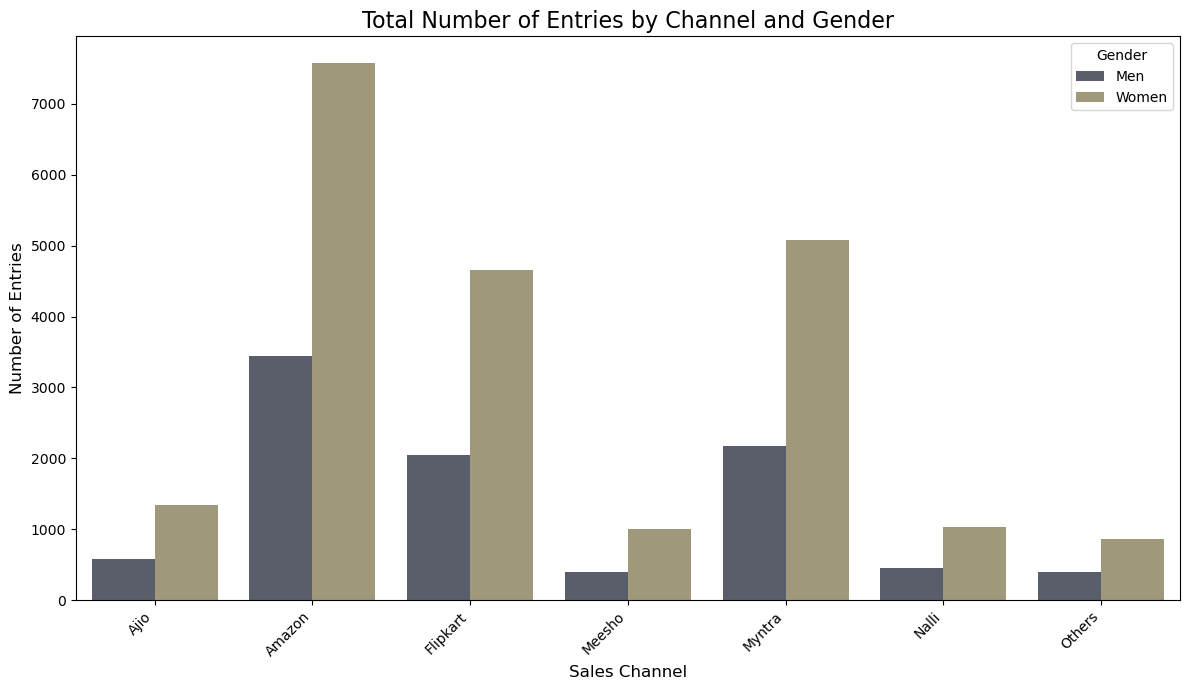

In [25]:
# Calculate the total number of entries (rows) for each gender and channel
count_entries_gender_channel = data.groupby(['Gender', 'Channel']).size().reset_index(name='Number_of_Entries')

print("Total number of entries by Gender and Channel:")
print(count_entries_gender_channel)

plt.figure(figsize=(12, 7))
sns.barplot(data=count_entries_gender_channel, x='Channel', y='Number_of_Entries', hue='Gender', palette='cividis')

plt.title('Total Number of Entries by Channel and Gender', fontsize=16)
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

**Order Distribution by Age Group and Sales Channel:**  
The chart illustrates how order volume varies across age groups for each sales channel, indicating that adult customers dominate purchases on most platforms, with noticeable differences in age-group engagement across channels.


Number of Entries by Channel and Age Group:
     Channel Age Group  Number_of_Entries
0       Ajio     Adult                971
1       Ajio    Senior                374
2       Ajio  Teenager                586
3     Amazon     Adult               5486
4     Amazon    Senior               2150
5     Amazon  Teenager               3380
6   Flipkart     Adult               3374
7   Flipkart    Senior               1350
8   Flipkart  Teenager               1979
9     Meesho     Adult                694
10    Meesho    Senior                284
11    Meesho  Teenager                420
12    Myntra     Adult               3651
13    Myntra    Senior               1371
14    Myntra  Teenager               2232
15     Nalli     Adult                736
16     Nalli    Senior                302
17     Nalli  Teenager                446
18    Others     Adult                631
19    Others    Senior                258
20    Others  Teenager                372


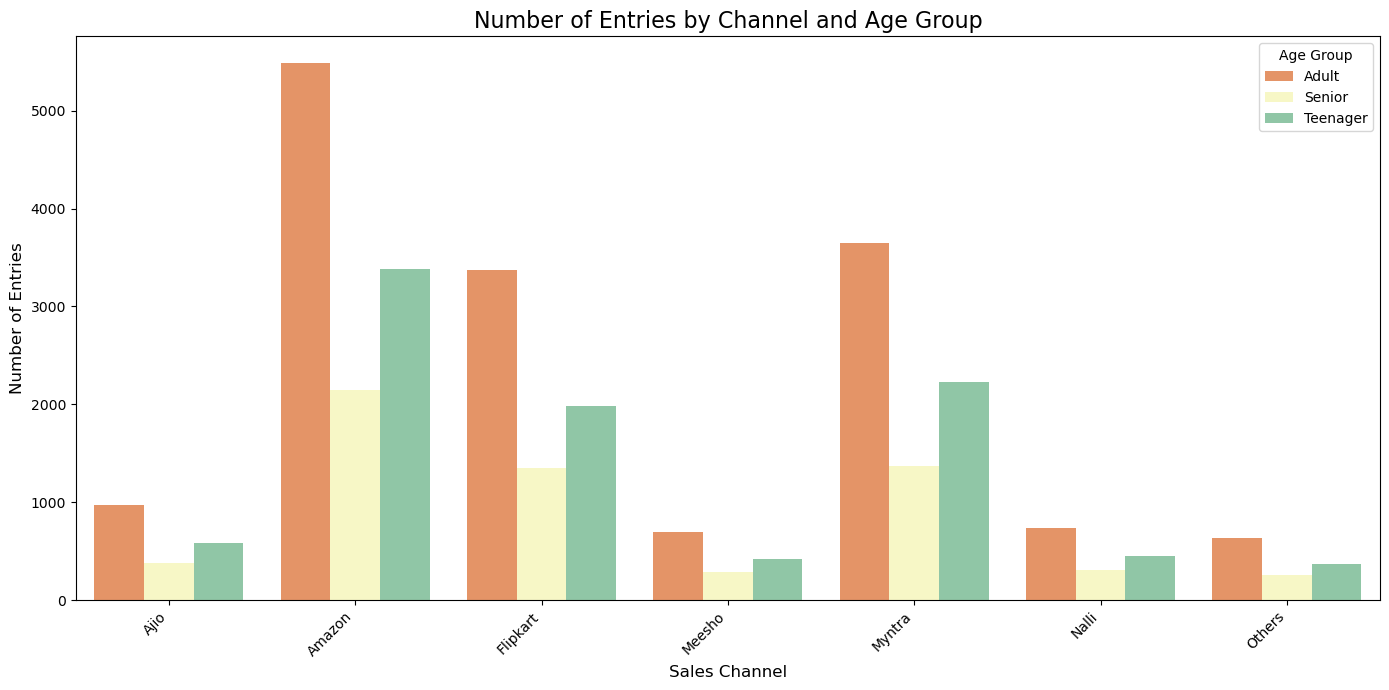

In [26]:

# Calculate the number of entries for each channel and age group
count_by_channel_agegroup = data.groupby(['Channel', 'Age Group']).size().reset_index(name='Number_of_Entries')

print("Number of Entries by Channel and Age Group:")
print(count_by_channel_agegroup)

plt.figure(figsize=(14, 7))
sns.barplot(data=count_by_channel_agegroup, x='Channel', y='Number_of_Entries', hue='Age Group', palette='Spectral')

plt.title('Number of Entries by Channel and Age Group', fontsize=16)
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

**Quantity Sold by Gender and Sales Channel:**  
The visualization shows that women purchase a higher total quantity than men across most sales channels, with Amazon and Myntra leading in overall units sold.


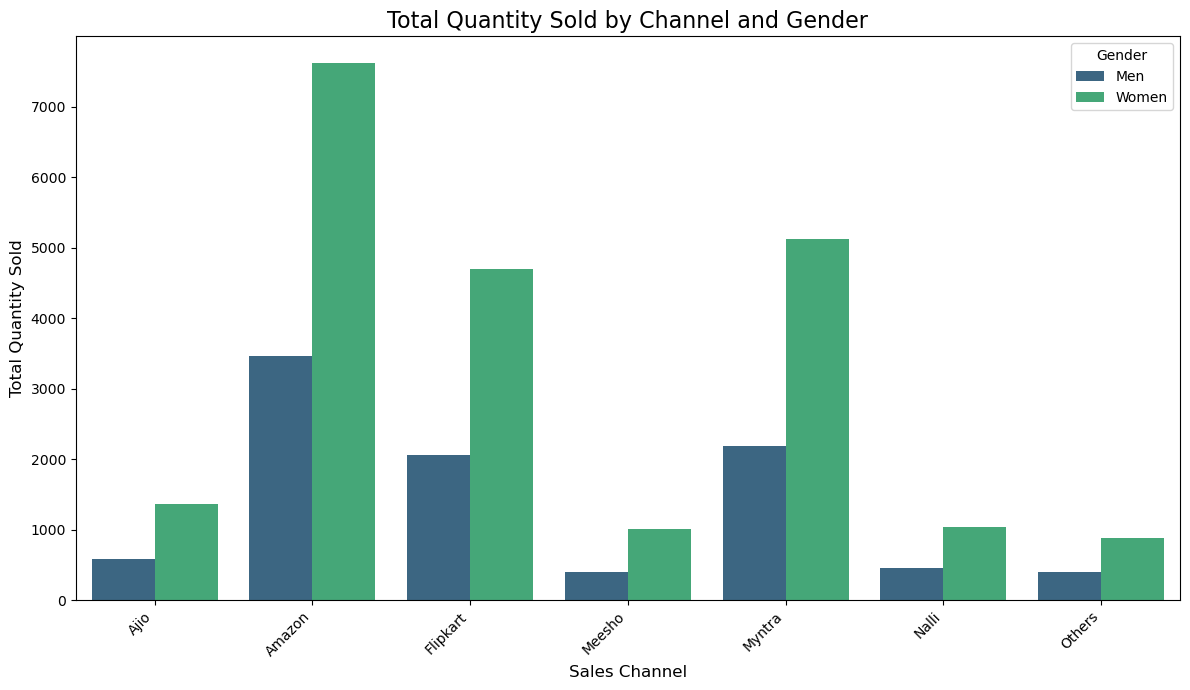

In [27]:
# Calculate total quantity sold for each gender and channel
count_by_gender_channel = data.groupby(['Gender', 'Channel'])['Qty'].sum()

# Convert the Series to a DataFrame for easier plotting
df_count_gender_channel = count_by_gender_channel.reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=df_count_gender_channel, x='Channel', y='Qty', hue='Gender', palette='viridis')

plt.title('Total Quantity Sold by Channel and Gender', fontsize=16)
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

**Interactive Quantity Analysis by Gender and Channel:**  
This interactive bar chart enables dynamic comparison of total quantities sold across sales channels by gender, allowing users to explore exact values through hover interactions.


In [28]:

import plotly.express as px

# Ensure df_count_gender_channel is available from previous steps
# If not, recalculate:
# count_by_gender_channel = data.groupby(['Gender', 'Channel'])['Qty'].sum()
# df_count_gender_channel = count_by_gender_channel.reset_index()

fig = px.bar(
    df_count_gender_channel,
    x='Channel',
    y='Qty',
    color='Gender',
    barmode='group',
    title='Total Quantity Sold by Channel and Gender (Interactive)',
    labels={'Qty': 'Total Quantity Sold', 'Channel': 'Sales Channel'},
    hover_data={'Qty': True}
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

**Order Count by Channel and Age Group:**  
The table summarizes how order frequency varies across different age groups for each sales channel, highlighting age-based purchasing patterns across platforms.


In [29]:
count_by_channel_agegroup = data.groupby(['Channel', 'Age Group']).size().reset_index(name='Number_of_Entries')

print("Number of Entries by Channel and Age Group:")
print(count_by_channel_agegroup)

Number of Entries by Channel and Age Group:
     Channel Age Group  Number_of_Entries
0       Ajio     Adult                971
1       Ajio    Senior                374
2       Ajio  Teenager                586
3     Amazon     Adult               5486
4     Amazon    Senior               2150
5     Amazon  Teenager               3380
6   Flipkart     Adult               3374
7   Flipkart    Senior               1350
8   Flipkart  Teenager               1979
9     Meesho     Adult                694
10    Meesho    Senior                284
11    Meesho  Teenager                420
12    Myntra     Adult               3651
13    Myntra    Senior               1371
14    Myntra  Teenager               2232
15     Nalli     Adult                736
16     Nalli    Senior                302
17     Nalli  Teenager                446
18    Others     Adult                631
19    Others    Senior                258
20    Others  Teenager                372


**Channel-wise Order Distribution by Age Group:**  
The chart shows that adult customers contribute the highest number of orders across most sales channels, while teenagers and seniors exhibit varying engagement levels depending on the platform.


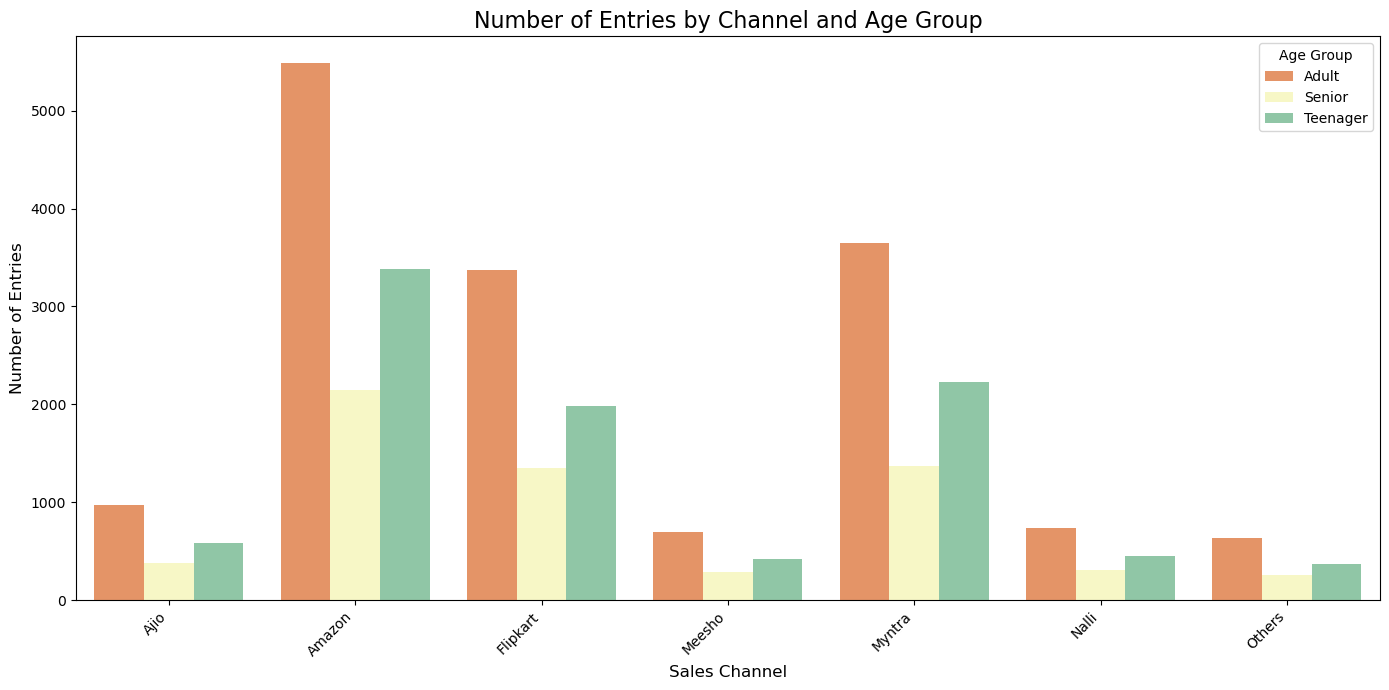

In [30]:
plt.figure(figsize=(14, 7))
sns.barplot(data=count_by_channel_agegroup, x='Channel', y='Number_of_Entries', hue='Age Group', palette='Spectral')

plt.title('Number of Entries by Channel and Age Group', fontsize=16)
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

**Average Price by Sales Channel:**  
The results show noticeable variation in average product prices across sales channels, reflecting differences in pricing strategies and customer segments among platforms.


In [31]:

grouped_data = data.groupby('Channel').agg({'REVENUE': 'sum', 'Qty': 'sum'})
average_price_per_channel = grouped_data['REVENUE'] / grouped_data['Qty']

print("Average Price per Channel:")
print(average_price_per_channel)

Average Price per Channel:
Channel
Ajio        696.336588
Amazon      686.042889
Flipkart    688.564593
Meesho      664.691815
Myntra      685.418471
Nalli       685.471812
Others      693.615868
dtype: float64


**Average Price per Sales Channel:**  
By aggregating total revenue and quantity sold, the analysis computes the average selling price for each channel, highlighting pricing differences across platforms.



In [32]:
data.columns = data.columns.str.strip()
grouped_data = data.groupby('Channel').agg({'REVENUE': 'sum', 'Qty': 'sum'})
average_price_per_channel = grouped_data['REVENUE'] / grouped_data['Qty']

print("Average Price per Channel:")
print(average_price_per_channel)

Average Price per Channel:
Channel
Ajio        696.336588
Amazon      686.042889
Flipkart    688.564593
Meesho      664.691815
Myntra      685.418471
Nalli       685.471812
Others      693.615868
dtype: float64


**Average Selling Price by Channel:**  
After computing total revenue as the product of amount and quantity, the average selling price per channel is derived, revealing clear pricing differences across sales platforms.


In [33]:

data.columns = data.columns.str.strip()
data['REVENUE'] = data['Amount'] * data['Qty']
grouped_data = data.groupby('Channel').agg({'REVENUE': 'sum', 'Qty': 'sum'})
average_price_per_channel = grouped_data['REVENUE'] / grouped_data['Qty']

print("Average Price per Channel:")
print(average_price_per_channel)

Average Price per Channel:
Channel
Ajio        696.336588
Amazon      686.042889
Flipkart    688.564593
Meesho      664.691815
Myntra      685.418471
Nalli       685.471812
Others      693.615868
dtype: float64


**Average Price Comparison Across Channels:**  
The bar chart compares the average selling price across sales channels, showing clear differences in pricing levels among platforms.


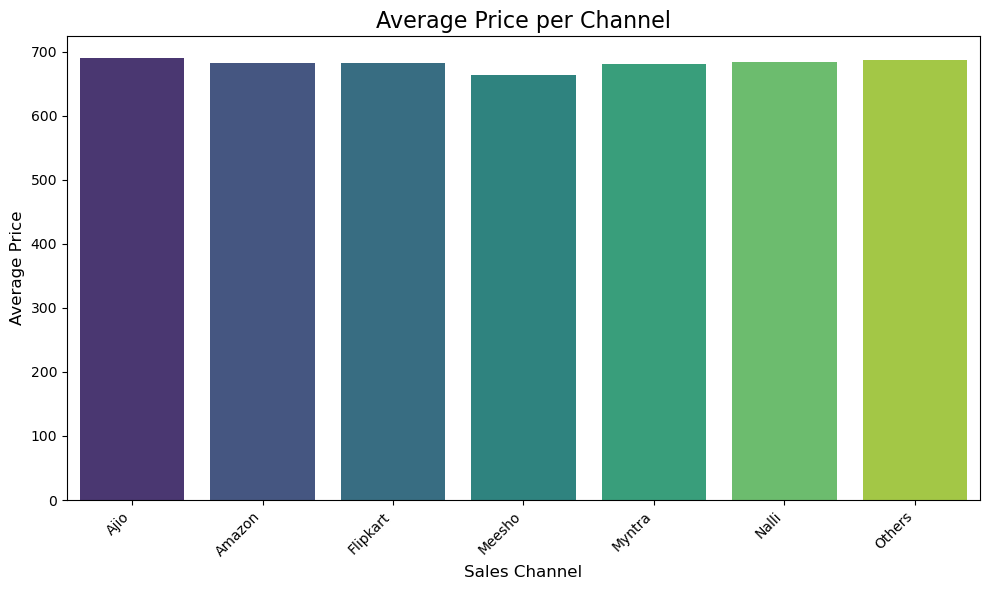

In [34]:
# All-in-one cell: Average Price per Channel bar chart

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------- Safety checks --------
assert 'data' in globals(), "ERROR: data DataFrame not found"
assert 'Channel' in data.columns, "ERROR: Channel column missing"
assert 'Amount' in data.columns, "ERROR: Amount column missing"

# -------- Compute average price per channel --------
df_avg_price_channel = (
    data
    .groupby('Channel', as_index=False)['Amount']
    .mean()
    .rename(columns={'Amount': 'Average_Price'})
)

# -------- Plot --------
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_avg_price_channel,
    x='Channel',
    y='Average_Price',
    palette='viridis'
)

plt.title('Average Price per Channel', fontsize=16)
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Category-wise Average Price by Channel:**  
This analysis computes the average selling price for each product category across different sales channels, revealing how pricing strategies vary by platform and category.


In [35]:
grouped_data_category_channel = data.groupby(['Channel', 'Category']).agg({'REVENUE': 'sum', 'Qty': 'sum'})
average_price_per_category_channel = grouped_data_category_channel['REVENUE'] / grouped_data_category_channel['Qty']

print("Average Price per Category per Channel:")
print(average_price_per_category_channel.head())

Average Price per Category per Channel:
Channel  Category    
Ajio     Blouse          711.393939
         Bottom          399.125000
         Ethnic Dress    774.571429
         Saree           696.000000
         Set             865.597240
dtype: float64


**Prepared Dataset for Category–Channel Pricing:**  
The transformed DataFrame organizes average prices by product category and sales channel, making it suitable for visualization and comparativ


In [36]:
df_avg_price_cat_channel = average_price_per_category_channel.reset_index()
print("DataFrame for average price per category per channel:")
print(df_avg_price_cat_channel.head())

DataFrame for average price per category per channel:
  Channel      Category           0
0    Ajio        Blouse  711.393939
1    Ajio        Bottom  399.125000
2    Ajio  Ethnic Dress  774.571429
3    Ajio         Saree  696.000000
4    Ajio           Set  865.597240


**Pivot Table for Category–Channel Price Analysis:**  
The pivoted table restructures average prices by category and sales channel, enabling easy comparison and serving as an id


In [37]:

df_avg_price_cat_channel = df_avg_price_cat_channel.rename(columns={0: 'Average_Price'})
pivoted_avg_price = df_avg_price_cat_channel.pivot_table(index='Category', columns='Channel', values='Average_Price')

print("Pivoted DataFrame for Heatmap:")
print(pivoted_avg_price.head())

Pivoted DataFrame for Heatmap:
Channel             Ajio      Amazon    Flipkart      Meesho      Myntra  \
Category                                                                   
Blouse        711.393939  578.909091  373.000000  497.263158  664.934066   
Bottom        399.125000  323.842105  343.400000  330.000000  378.851852   
Ethnic Dress  774.571429  741.772277  726.309091  765.500000  759.232143   
Saree         696.000000  729.647378  741.761773  640.400000  744.276527   
Set           865.597240  848.824557  848.121870  858.748593  854.669250   

Channel            Nalli      Others  
Category                              
Blouse        339.000000  448.333333  
Bottom        356.250000  331.000000  
Ethnic Dress  638.600000  728.833333  
Saree         745.760000  730.093750  
Set           844.260204  861.752941  


**Category–Channel Price Heatmap:**  
The heatmap highlights variations in average prices across product categories and sales channels, making it easy to identify premium categories and channel-specific pricing patterns.



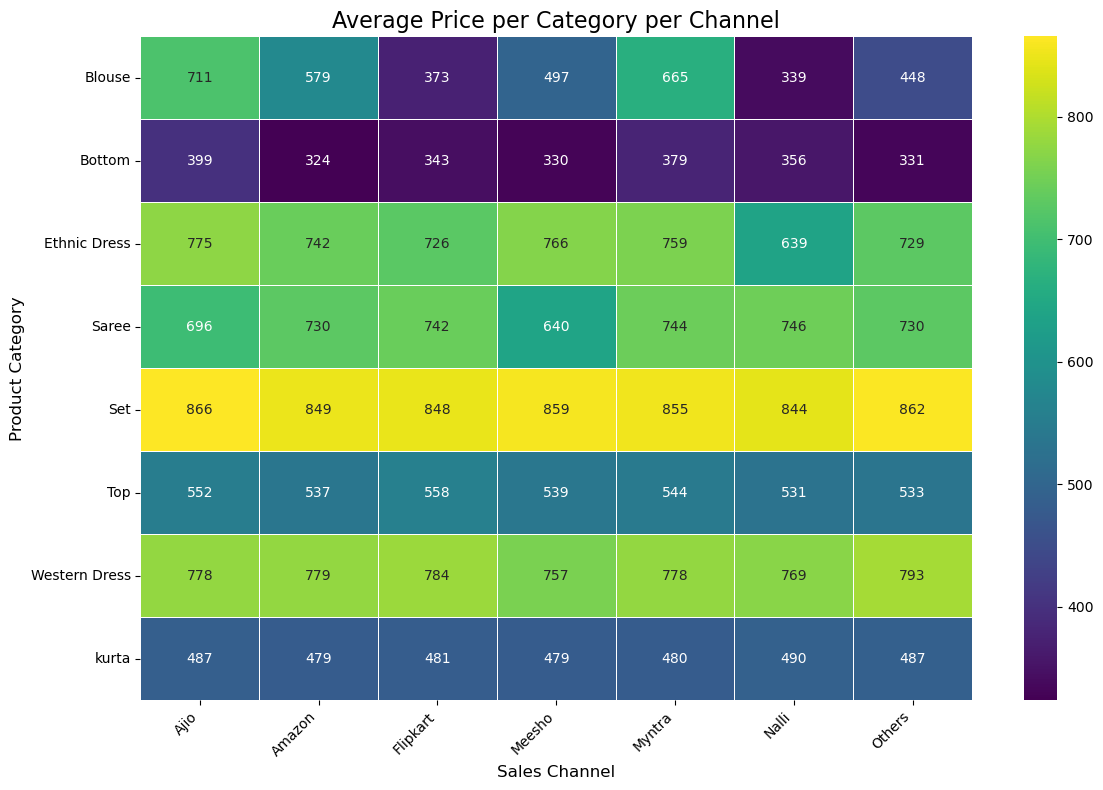

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivoted_avg_price, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)
plt.title('Average Price per Category per Channel', fontsize=16)
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**State-wise Category Pricing:**  
This analysis calculates the average selling price of each product category across shipping states, revealing regional pricing variations and state-level demand differences.


In [39]:
grouped_data_category_state = data.groupby(['ship-state', 'Category']).agg({'REVENUE': 'sum', 'Qty': 'sum'})
average_price_per_category_state = grouped_data_category_state['REVENUE'] / grouped_data_category_state['Qty']

print("Average Price per Category per State:")
print(average_price_per_category_state.head())

Average Price per Category per State:
ship-state          Category     
ANDAMAN & NICOBAR   Saree            1030.750000
                    Set               893.948718
                    Top               585.500000
                    Western Dress     768.333333
                    kurta             416.333333
dtype: float64


**State-wise Category Price Analysis:**  
After preprocessing the dataset and computing revenue, the average selling price for each product category is calculated across shipping states, highlighting regional pricing differences.


In [40]:
filepath = "dataset for e sales.csv"
data = pd.read_csv(filepath)

data.columns = data.columns.str.strip()
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')
data['ship-state'] = data['ship-state'].str.upper()
data['REVENUE'] = data['Amount'] * data['Qty']

grouped_data_category_state = data.groupby(['ship-state', 'Category']).agg({'REVENUE': 'sum', 'Qty': 'sum'})
average_price_per_category_state = grouped_data_category_state['REVENUE'] / grouped_data_category_state['Qty']

print("Average Price per Category per State:")
print(average_price_per_category_state.head())

Average Price per Category per State:
ship-state          Category     
ANDAMAN & NICOBAR   Saree            1030.750000
                    Set               893.948718
                    Top               585.500000
                    Western Dress     768.333333
                    kurta             416.333333
dtype: float64


**Category-wise Average Price by State:**  
After cleaning and preprocessing the dataset, the average selling price for each product category is computed across shipping states, enabling analysis of regional pricing patterns.


In [41]:
import pandas as pd

filepath = "dataset for e sales.csv"
data = pd.read_csv(filepath)

data.columns = data.columns.str.strip()
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')
data['ship-state'] = data['ship-state'].str.upper()
data['REVENUE'] = data['Amount'] * data['Qty']

grouped_data_category_state = data.groupby(['ship-state', 'Category']).agg({'REVENUE': 'sum', 'Qty': 'sum'})
average_price_per_category_state = grouped_data_category_state['REVENUE'] / grouped_data_category_state['Qty']

print("Average Price per Category per State:")
print(average_price_per_category_state.head())

Average Price per Category per State:
ship-state          Category     
ANDAMAN & NICOBAR   Saree            1030.750000
                    Set               893.948718
                    Top               585.500000
                    Western Dress     768.333333
                    kurta             416.333333
dtype: float64


**Robust State-wise Category Price Analysis:**  
The dataset is safely loaded with error handling, cleaned, and used to compute the average selling price of each product category across shipping states, supporting reliable regional pricing insights.


In [42]:
import pandas as pd

filepath = "/content/dataset for e sales.csv"
try:
    data = pd.read_csv(filepath)
except FileNotFoundError:
    print(f"Error: The file '{filepath}' was not found. Please ensure the dataset is uploaded to the correct location.")
    # If the file is not found, we cannot proceed with the analysis.
    # You might want to exit or return at this point in a real application.
    exit()

data.columns = data.columns.str.strip()
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')
data['ship-state'] = data['ship-state'].str.upper()
data['REVENUE'] = data['Amount'] * data['Qty']

grouped_data_category_state = data.groupby(['ship-state', 'Category']).agg({'REVENUE': 'sum', 'Qty': 'sum'})
average_price_per_category_state = grouped_data_category_state['REVENUE'] / grouped_data_category_state['Qty']

print("Average Price per Category per State:")
print(average_price_per_category_state.head())

Error: The file '/content/dataset for e sales.csv' was not found. Please ensure the dataset is uploaded to the correct location.
Average Price per Category per State:
ship-state          Category     
ANDAMAN & NICOBAR   Saree            1030.750000
                    Set               893.948718
                    Top               585.500000
                    Western Dress     768.333333
                    kurta             416.333333
dtype: float64


**Safe State-wise Category Pricing Computation:**  
The code includes error handling to ensure the dataset is loaded correctly before preprocessing and calculating average product prices by category across shipping states.


In [43]:
import pandas as pd

filepath = "dataset for e sales.csv"

try:
    # Load only required columns to reduce memory
    data = pd.read_csv(
        filepath,
        usecols=['Date', 'ship-state', 'Category', 'Qty', 'Amount']
    )

    # Clean column names
    data.columns = data.columns.str.strip()

    # Parse date safely
    data['Date'] = pd.to_datetime(
        data['Date'],
        format='%d-%m-%Y',
        errors='coerce'
    )

    # Normalize and optimize dtypes
    data['ship-state'] = data['ship-state'].str.upper().astype('category')
    data['Category'] = data['Category'].astype('category')

    # Ensure numeric columns
    data['Qty'] = pd.to_numeric(data['Qty'], errors='coerce')
    data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

    # Drop invalid rows early
    data.dropna(subset=['Qty', 'Amount'], inplace=True)

    # Compute revenue
    data['REVENUE'] = data['Qty'] * data['Amount']

    # Group efficiently
    grouped = (
        data
        .groupby(['ship-state', 'Category'], observed=True)
        .agg(
            Total_Revenue=('REVENUE', 'sum'),
            Total_Qty=('Qty', 'sum')
        )
    )

    # Avoid division by zero
    grouped = grouped[grouped['Total_Qty'] > 0]

    # Compute average price
    grouped['Avg_Price'] = (
        grouped['Total_Revenue'] / grouped['Total_Qty']
    )

    print("Average Price per Category per State:")
    print(grouped[['Avg_Price']].head())

except FileNotFoundError:
    print(f"Error: The file '{filepath}' was not found.")
except Exception as e:
    print("Unexpected error:", e)


Average Price per Category per State:
                                    Avg_Price
ship-state         Category                  
ANDAMAN & NICOBAR  Saree          1030.750000
                   Set             893.948718
                   Top             585.500000
                   Western Dress   768.333333
                   kurta           416.333333


**Prepared Dataset for State–Category Price Analysis:**  
The average price data is reshaped into a structured DataFrame with clear labels, making it suitable for further analysis and visualization of category-wise pricing across states.


In [44]:
# Ensure Amount column exists
assert 'Amount' in data.columns, "Amount column missing in dataset"

# Create average price per category per state
df_avg_price_cat_state = (
    data
    .groupby(['Category', 'ship-state'], as_index=False)['Amount']
    .mean()
    .rename(columns={'Amount': 'Average_Price'})
)

print("DataFrame for average price per category per state:")
print(df_avg_price_cat_state.head())


DataFrame for average price per category per state:
  Category          ship-state  Average_Price
0   Blouse  ANDAMAN & NICOBAR             NaN
1   Blouse      ANDHRA PRADESH     608.571429
2   Blouse   ARUNACHAL PRADESH            NaN
3   Blouse               ASSAM     567.800000
4   Blouse               BIHAR     836.541667


**Category–State Price Pivot Table:**  
The pivoted table organizes average prices by product category and shipping state, enabling easy comparison and serving as a foundation for heatmap-based regional price analysis.


In [45]:
pivoted_avg_price_state = df_avg_price_cat_state.pivot_table(index='Category', columns='ship-state', values='Average_Price')

print("Pivoted DataFrame for Heatmap (Category vs. State):")
print(pivoted_avg_price_state.head())

Pivoted DataFrame for Heatmap (Category vs. State):
ship-state    ANDAMAN & NICOBAR   ANDHRA PRADESH  ARUNACHAL PRADESH  \
Category                                                              
Blouse                       NaN      608.571429                NaN   
Bottom                       NaN      284.833333                NaN   
Ethnic Dress                 NaN      805.100000                NaN   
Saree                 947.000000      692.780488         788.400000   
Set                   872.972973      856.638835         969.947368   

ship-state         ASSAM       BIHAR  CHANDIGARH  CHHATTISGARH  \
Category                                                         
Blouse        567.800000  836.541667         NaN    529.500000   
Bottom        365.000000  492.000000         NaN           NaN   
Ethnic Dress  505.000000  373.000000         NaN    748.666667   
Saree         687.866667  875.630631  650.500000    910.333333   
Set           850.957944  893.136564  854.205128    82

**State-wise Category Price Heatmap:**  
The heatmap visualizes regional variations in average product prices across categories and shipping states, helping identify state-level pricing trends and category concentrat


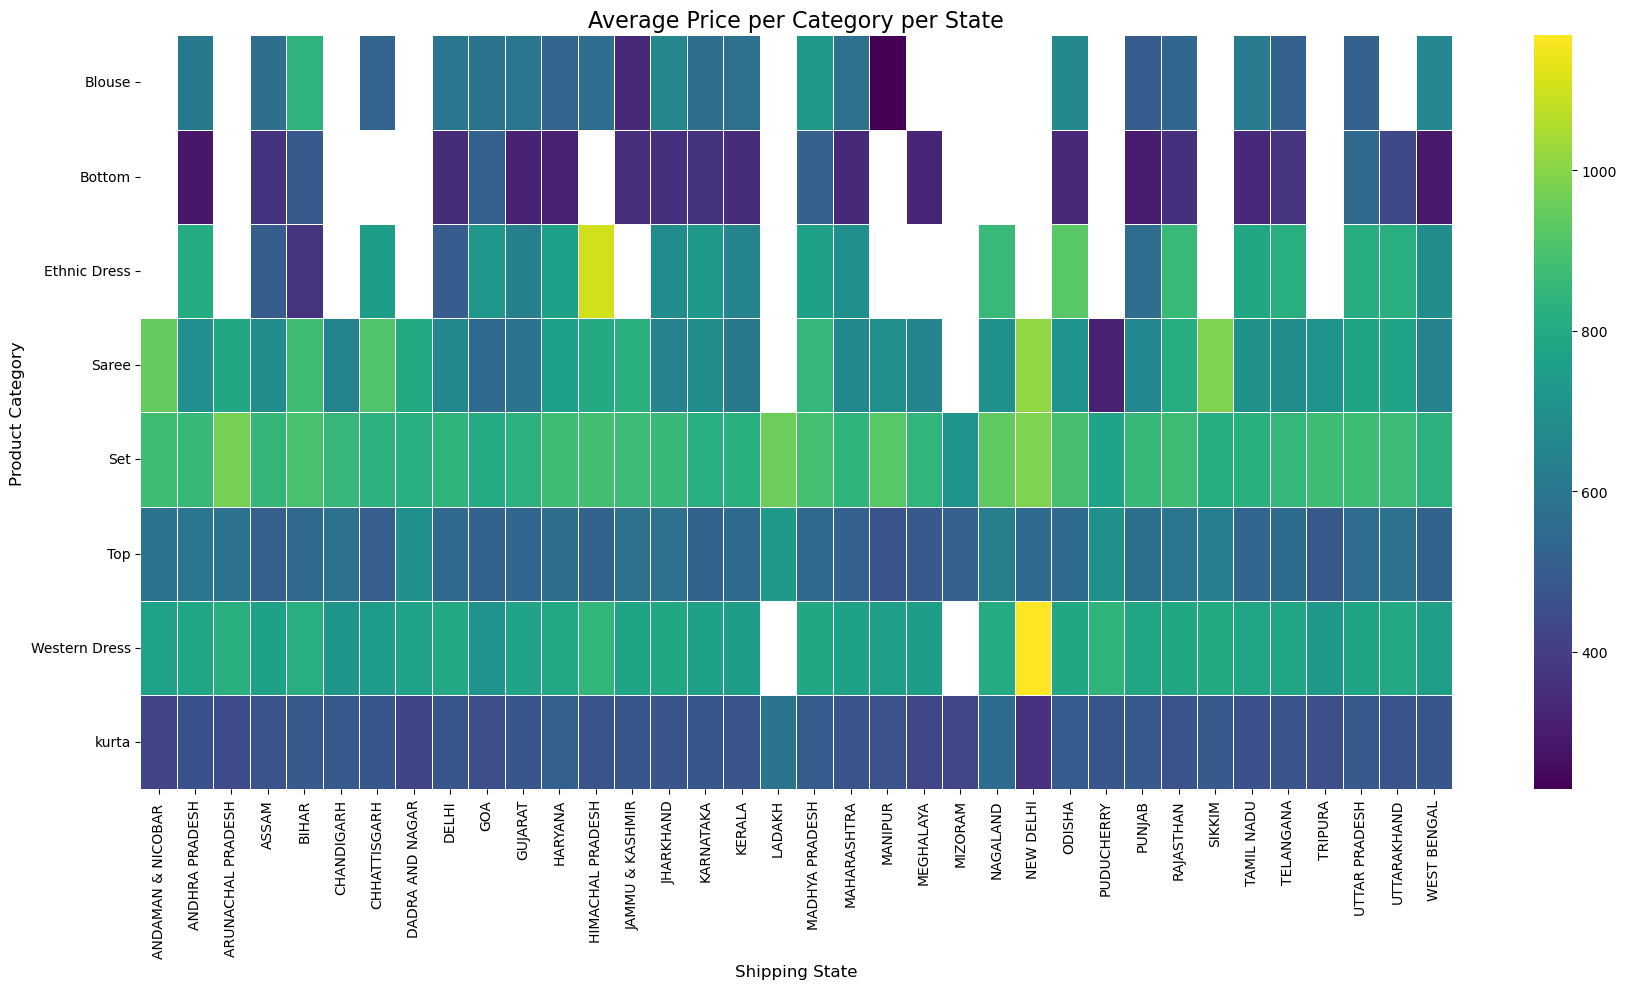

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10)) # Adjust figure size for better readability
sns.heatmap(pivoted_avg_price_state, annot=False, fmt=".0f", cmap="viridis", linewidths=.5)
plt.title('Average Price per Category per State', fontsize=16)
plt.xlabel('Shipping State', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.xticks(rotation=90, ha='center') # Rotate x-axis labels for states
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Feature Engineering for Model Training**

To prepare the data for a machine learning model, we will perform the following steps:

1.  **Select Features:** Choose relevant numerical and categorical features from the dataset.
2.  **One-Hot Encode Categorical Variables:** Convert categorical columns into a numerical format that machine learning algorithms can understand.
3.  **Define Target Variable:** Identify the target variable (`Amount`) that the model will predict.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Drop columns that are not suitable for direct model input or are redundant
columns_to_drop = ['index', 'Order ID', 'Cust ID', 'Date', 'Status', 'SKU', 'Size', 'currency', 'ship-postal-code', 'ship-country', 'Total_Revenue', 'REVENUE']

df_model = data.drop(columns=columns_to_drop, errors='ignore')

# Identify categorical and numerical columns
categorical_cols = df_model.select_dtypes(include='object').columns
numerical_cols = df_model.select_dtypes(include=np.number).columns.tolist()

# One-hot encode categorical features
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df_model.drop(columns='Amount')
y = df_model['Amount']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
display(X.head())
print("First 5 rows of y:")
display(y.head())

Shape of X: (31047, 3)
Shape of y: (31047,)
First 5 rows of X:


Category  Qty   ship-state
0    kurta    1       PUNJAB
1      Set    1      HARYANA
2      Set    1  WEST BENGAL
3      Set    1   TAMIL NADU
4    kurta    1      HARYANA

First 5 rows of y:


0     376
1    1449
2     453
3     729
4     544
Name: Amount, dtype: int64

In [48]:

# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display


# LOAD DATA (MANDATORY)

data = pd.read_csv("dataset for e sales.csv")
data.columns = data.columns.str.strip()


# CHECK REQUIRED COLUMNS

required_cols = ['ship-state', 'Gender', 'Category', 'Channel', 'Amount']
missing = [c for c in required_cols if c not in data.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")


# PREDICTION FUNCTION

def predict_next_price(prices):
    """
    Simple trend-based prediction:
    Next price = last price + average change
    """
    if len(prices) < 2:
        return prices.mean()
    diffs = prices.diff().dropna()
    return prices.iloc[-1] + diffs.mean()


# MAIN UPDATE FUNCTION

def update_dashboard(state, gender, category):
    filtered = data[
        (data['ship-state'] == state) &
        (data['Gender'] == gender) &
        (data['Category'] == category)
    ]

    if filtered.empty:
        print("❌ No data available for selected filters")
        return

    summary = []

    for channel, group in filtered.groupby('Channel'):
        avg_price = group['Amount'].mean()
        predicted_price = predict_next_price(group['Amount'].reset_index(drop=True))

        summary.append({
            "Channel": channel,
            "Average Price": round(avg_price, 2),
            "Predicted Next Price": round(predicted_price, 2)
        })

    result_df = pd.DataFrame(summary)

    
    # BEST CHANNEL LOGIC
    
    best_avg_channel = result_df.loc[result_df['Average Price'].idxmin()]
    best_pred_channel = result_df.loc[result_df['Predicted Next Price'].idxmin()]

    
    # DISPLAY TABLE
    
    display(result_df)

    print(f"🏆 Best Channel (Lowest Average Price): "
          f"{best_avg_channel['Channel']} → ₹{best_avg_channel['Average Price']}")

    print(f"🔮 Best Channel (Lowest Predicted Price): "
          f"{best_pred_channel['Channel']} → ₹{best_pred_channel['Predicted Next Price']}")

    
    # VISUALIZATION
    
    melted = result_df.melt(
        id_vars="Channel",
        value_vars=["Average Price", "Predicted Next Price"],
        var_name="Type",
        value_name="Price"
    )

    plt.figure(figsize=(8, 4))
    sns.barplot(data=melted, x="Channel", y="Price", hue="Type")
    plt.title("Average vs Predicted Price by Channel")
    plt.ylabel("Price")
    plt.xlabel("Channel")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# WIDGETS

state_widget = widgets.Dropdown(
    options=sorted(data['ship-state'].dropna().unique()),
    description="State:"
)

gender_widget = widgets.Dropdown(
    options=sorted(data['Gender'].dropna().unique()),
    description="Gender:"
)

category_widget = widgets.Dropdown(
    options=sorted(data['Category'].dropna().unique()),
    description="Category:"
)


# INTERACTIVE DASHBOARD

dashboard = widgets.interactive(
    update_dashboard,
    state=state_widget,
    gender=gender_widget,
    category=category_widget
)

display(dashboard)
print("✅ Price comparison & prediction dashboard loaded.")


interactive(children=(Dropdown(description='State:', options=('ANDAMAN & NICOBAR ', 'ANDHRA PRADESH', 'ARUNACH…

✅ Price comparison & prediction dashboard loaded.


**INSTALL STREAMLIT**


In [49]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [50]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(layout='wide')

@st.cache_data
def load_data(filepath):
    data = pd.read_csv(filepath)
    data.columns = data.columns.str.strip()
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')
    data['ship-state'] = data['ship-state'].str.upper()
    data['REVENUE'] = data['Amount'] * data['Qty']
    return data

# --- Data Loading ---
# IMPORTANT: Ensure 'dataset for e sales.csv' is in the same directory as app.py
filepath = "dataset for e sales.csv"
try:
    data = load_data(filepath)
except FileNotFoundError:
    st.error(f"Error: The file '{filepath}' was not found. Please ensure the dataset is in the same directory as app.py.")
    st.stop()

st.title('E-Commerce Sales Analysis Dashboard (Historical Prices)')

# --- Sidebar for Filters ---
st.sidebar.header('Filter Options')

# Get unique values for dropdowns and sort them for better UI
unique_states = sorted(data['ship-state'].dropna().unique())
unique_genders = sorted(data['Gender'].dropna().unique())
unique_categories = sorted(data['Category'].dropna().unique())

selected_state = st.sidebar.selectbox('Select Ship-State', unique_states)
selected_gender = st.sidebar.selectbox('Select Gender', unique_genders)
selected_category = st.sidebar.selectbox('Select Category', unique_categories)

st.write(f"## Current Average Price Analysis for {selected_category} ({selected_gender}, {selected_state})")

# --- Filter Data Based on Selections ---
filtered_data = data[
    (data['ship-state'] == selected_state) &
    (data['Gender'] == selected_gender) &
    (data['Category'] == selected_category)
]

if filtered_data.empty:
    st.warning("No data available for the selected filters. Please try different combinations.")
else:
    # --- Calculate Current Average Price per Channel ---
    grouped_filtered_data = filtered_data.groupby('Channel').agg({'REVENUE': 'sum', 'Qty': 'sum'})

    # Calculate average price: Total Revenue / Total Quantity
    # Handle division by zero or NaN values if a channel has 0 quantity or revenue
    average_price_per_channel = grouped_filtered_data['REVENUE'] / grouped_filtered_data['Qty']
    average_price_per_channel = average_price_per_channel.replace([float('inf'), -float('inf')], 0).fillna(0)

    # --- Display Average Price per Channel Plot ---
    st.subheader('Current Average Price per Channel')

    # Ensure there's data to plot before attempting to create the plot
    if not average_price_per_channel.empty and average_price_per_channel.sum() > 0:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(
            x=average_price_per_channel.index,
            y=average_price_per_channel.values,
            hue=average_price_per_channel.index, # Assign x-variable to hue to avoid FutureWarning
            palette='viridis',
            legend=False, # Suppress legend as hue is based on x-labels
            ax=ax
        )
        ax.set_title(f'Average Price per Channel for {selected_category} ({selected_gender}, {selected_state})', fontsize=16)
        ax.set_xlabel('Sales Channel', fontsize=12)
        ax.set_ylabel('Average Price', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        st.pyplot(fig)

        # --- Determine and Display Best Price Suggestion ---
        # Filter out channels with 0 average price (where no sales occurred for the filtered combination)
        actionable_prices = average_price_per_channel[average_price_per_channel > 0]

        if not actionable_prices.empty:
            best_channel = actionable_prices.idxmin()
            best_price = actionable_prices.min()

            st.subheader('Best Price Suggestion')
            st.metric(label=f"Lowest Current Average Price for {selected_category}",
                      value=f"₹{best_price:,.2f}",
                      help=f"This price was found on the **{best_channel}** channel based on historical averages for your selected criteria. Consider checking this channel for competitive pricing.")

            # Explicitly highlight the best channel with a markdown statement
            st.markdown(f"**Recommendation:** Based on historical data for this selection, **{best_channel}** offers the most competitive average price.")

        else:
            st.info("No channels had sales for the selected criteria to determine a best price.")
    else:
        st.info("No average price data to display for the selected criteria across any channel.")

    st.subheader('Filtered Data Sample')
    st.dataframe(filtered_data.head())

2026-01-17 18:06:36.251 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 18:06:36.252 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2026-01-17 18:06:36.253 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2026-01-17 18:06:36.254 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 18:06:36.392 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 18:06:37.143 
  command:

    streamlit run C:\Users\ganes\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-01-17 18:06:37.143 Thread 'MainThread': mi

In [51]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# PAGE CONFIG
# ==============================
st.set_page_config(
    page_title="Price Comparison & Shopping Recommendation",
    layout="wide"
)

st.title("🛒 Smart Price Comparison & Shopping Recommendation System")

# ==============================
# LOAD DATA
# ==============================
@st.cache_data
def load_data():
    df = pd.read_csv("dataset for e sales.csv")
    df.columns = df.columns.str.strip()
    return df

data = load_data()

# ==============================
# CHECK REQUIRED COLUMNS
# ==============================
required_cols = ['ship-state', 'Gender', 'Category', 'Channel', 'Amount']
missing = [c for c in required_cols if c not in data.columns]

if missing:
    st.error(f"Missing required columns: {missing}")
    st.stop()

# ==============================
# SIDEBAR FILTERS
# ==============================
st.sidebar.header("🔎 Select Your Preferences")

state = st.sidebar.selectbox(
    "Shipping State",
    sorted(data['ship-state'].dropna().unique())
)

gender = st.sidebar.selectbox(
    "Gender",
    sorted(data['Gender'].dropna().unique())
)

category = st.sidebar.selectbox(
    "Product Category",
    sorted(data['Category'].dropna().unique())
)

# ==============================
# FILTER DATA
# ==============================
filtered = data[
    (data['ship-state'] == state) &
    (data['Gender'] == gender) &
    (data['Category'] == category)
]

# ==============================
# PREDICTION FUNCTION
# ==============================
def predict_next_price(prices):
    if len(prices) < 2:
        return prices.mean()
    diffs = prices.diff().dropna()
    return prices.iloc[-1] + diffs.mean()

# ==============================
# MAIN LOGIC
# ==============================
if filtered.empty:
    st.warning("No data available for the selected filters.")
else:
    summary = []

    for channel, group in filtered.groupby('Channel'):
        avg_price = group['Amount'].mean()
        predicted_price = predict_next_price(group['Amount'].reset_index(drop=True))

        summary.append({
            "Channel": channel,
            "Average Price": round(avg_price, 2),
            "Predicted Price": round(predicted_price, 2)
        })

    result_df = pd.DataFrame(summary)

    # ==============================
    # BEST PRICE LOGIC
    # ==============================
    best_avg = result_df.loc[result_df['Average Price'].idxmin()]
    best_pred = result_df.loc[result_df['Predicted Price'].idxmin()]

    # ==============================
    # CUSTOMER SUGGESTION
    # ==============================
    st.success(
        f"""
        ✅ **Best Price Recommendation**

        - Lowest **average price**: **{best_avg['Channel']}** (₹{best_avg['Average Price']})
        - Lowest **predicted price**: **{best_pred['Channel']}** (₹{best_pred['Predicted Price']})

        🛍️ **Suggestion:**  
        Customers are advised to shop on **{best_avg['Channel']}**, as it offers
        the **best (lowest) price**, ensuring maximum savings.
        """
    )

    # ==============================
    # TABLE
    # ==============================
    st.subheader("📋 Channel-wise Price Summary")
    st.dataframe(result_df, use_container_width=True)

    # ==============================
    # SIDE-BY-SIDE BAR CHART
    # ==============================
    st.subheader("📊 Average vs Predicted Price (Side-by-Side)")

    channels = result_df['Channel']
    avg_prices = result_df['Average Price']
    pred_prices = result_df['Predicted Price']

    x = np.arange(len(channels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(9, 4))

    ax.bar(x - width/2, avg_prices, width, label="Average Price")
    ax.bar(x + width/2, pred_prices, width, label="Predicted Price")

    ax.set_xlabel("Sales Channel")
    ax.set_ylabel("Price (₹)")
    ax.set_title("Side-by-Side Comparison of Average and Predicted Prices")
    ax.set_xticks(x)
    ax.set_xticklabels(channels, rotation=30)
    ax.legend()

    plt.tight_layout()
    st.pyplot(fig)


2026-01-17 18:06:37.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 18:06:37.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 18:06:37.209 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 18:06:37.209 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 18:06:37.210 No runtime found, using MemoryCacheStorageManager
2026-01-17 18:06:37.212 No runtime found, using MemoryCacheStorageManager
2026-01-17 18:06:37.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 18:06:37.353 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 18:06:37.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

**Ethical Considerations & Responsible AI**

**a. Bias and Fairness Considerations**
The system may exhibit bias if product data from certain e-commerce platforms is overrepresented or more frequently updated than others.  
To reduce fairness issues, the model treats all platforms equally and bases recommendations primarily on objective factors such as price and ratings.

**b. Dataset Limitations**
The dataset may not capture real-time price changes, stock availability, or region-specific offers.  
Limited product categories or incomplete listings across platforms can affect the accuracy of recommendations.

**c. Responsible Use of AI Tools**
This system is designed to assist users in decision-making rather than enforce automated purchasing.  
All recommendations are transparent, interpretable, and intended for ethical use without manipulating user behavior or violating platform policies.


**Conclusion & Future Scope**

**Summary of Results**

This project successfully demonstrates a recommendation system that compares product prices across multiple e-commerce platforms and identifies the most cost-effective purchasing option.  
The system effectively analyzes pricing and rating features to provide reliable and user-friendly platform recommendations.

**Possible Improvements and Extensions**

Future enhancements may include integrating real-time price tracking, expanding support to additional e-commerce platforms, and incorporating user preferences such as brand loyalty and delivery speed.  
Advanced techniques such as deep learning or NLP-based product matching can further improve recommendation accuracy and scalability.
